In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
import h5py
import zipfile
from tqdm.notebook import tqdm_notebook
from progress.bar import IncrementalBar
import random
ep=300
import random


In [2]:
# example of calculating the frechet inception distance in Keras
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.datasets.mnist import load_data
from skimage.transform import resize

# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# define two fake collections of images
images1 = randint(0, 255, 10*32*32*3)
images1 = images1.reshape((10,32,32,3))
images2 = randint(0, 255, 10*32*32*3)
images2 = images2.reshape((10,32,32,3))
print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# fid between images1 and images1
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)

87916544/87910968 [==============================] - 3s 0us/step
Prepared (10, 32, 32, 3) (10, 32, 32, 3)
Scaled (10, 299, 299, 3) (10, 299, 299, 3)
FID (same): -0.000
FID (different): 41.684


In [9]:
# example of calculating the frechet inception distance in Keras for cifar10
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.datasets.mnist import load_data
from skimage.transform import resize
from tensorflow.keras.datasets import cifar10
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(75,75,3))
# load cifar10 images
(images1, _), (images2, _) = cifar10.load_data()
shuffle(images1)
images1 = images1[:10000]
print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (75,75,3))
images2 = scale_images(images2, (75,75,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
print(images1.shape)
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

Loaded (10000, 32, 32, 3) (10000, 32, 32, 3)


KeyboardInterrupt: 

In [2]:
with h5py.File("mc_wfmax_norm.h5",'r') as f:
    print(list(f.keys()))
    norm_param=f['norm_param'][:]
    test=f['test'][:]
    train=f['train'][:472320]
    print(f['train'].shape)
# mean=train.mean()
# train=train-mean
# train=train/(np.absolute(train)).max()
train=(train+1)/2
test=(test+1)/2
print(train.min(),train.max(),train.mean())
print(len(train))
print(norm_param)

['norm_param', 'test', 'train']
(472351, 128, 2)
0.0 1.0 0.025971571
472320
[[ 0.04490717  0.04396976]
 [-0.99174523 -0.9909725 ]]


In [3]:
test.shape

(118087, 128, 2)

In [15]:
model = InceptionV3(include_top=False, pooling='avg', input_shape=(128,75,3))
# load cifar10 images
# (images1, _), (images2, _) = cifar10.load_data()
images1=train[:118087]
images2=test
shuffle(images1)
# images1 = images1[:10000]
print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
# images1 = scale_images(images1, (75,75,3))
# images2 = scale_images(images2, (75,75,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
print(images1.shape)
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

Loaded (118087, 128, 2) (118087, 128, 2)
Scaled (118087, 128, 2) (118087, 128, 2)
(118087, 128, 2)


ValueError: in user code:

    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer inception_v3: expected shape=(None, 128, 75, 3), found shape=(None, 128, 2)


In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [5]:
def image(n,num=10):
    fig, axes =plt.subplots(num,2,figsize=(50,50))
    

    for i in range(num):
        noise = tf.random.normal(shape=(1,noise_dim))
        axes[i,0].plot((generator(noise))[0,:,1],'r')#change
        axes[i,0].plot((generator(noise))[0,:,0],'b')
        j=random.randint(0,len(train))
        axes[i,1].plot(train[j,:,1],'r')
        axes[i,1].plot(train[j,:,0],'b')
        plt.suptitle("epoch:"+str(n))
#         plt.savefig("WGAN_3/save_images/epoch"+str(n)+'.png')
# image(20)

In [5]:
tf.reduce_max(train[0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.086779416>

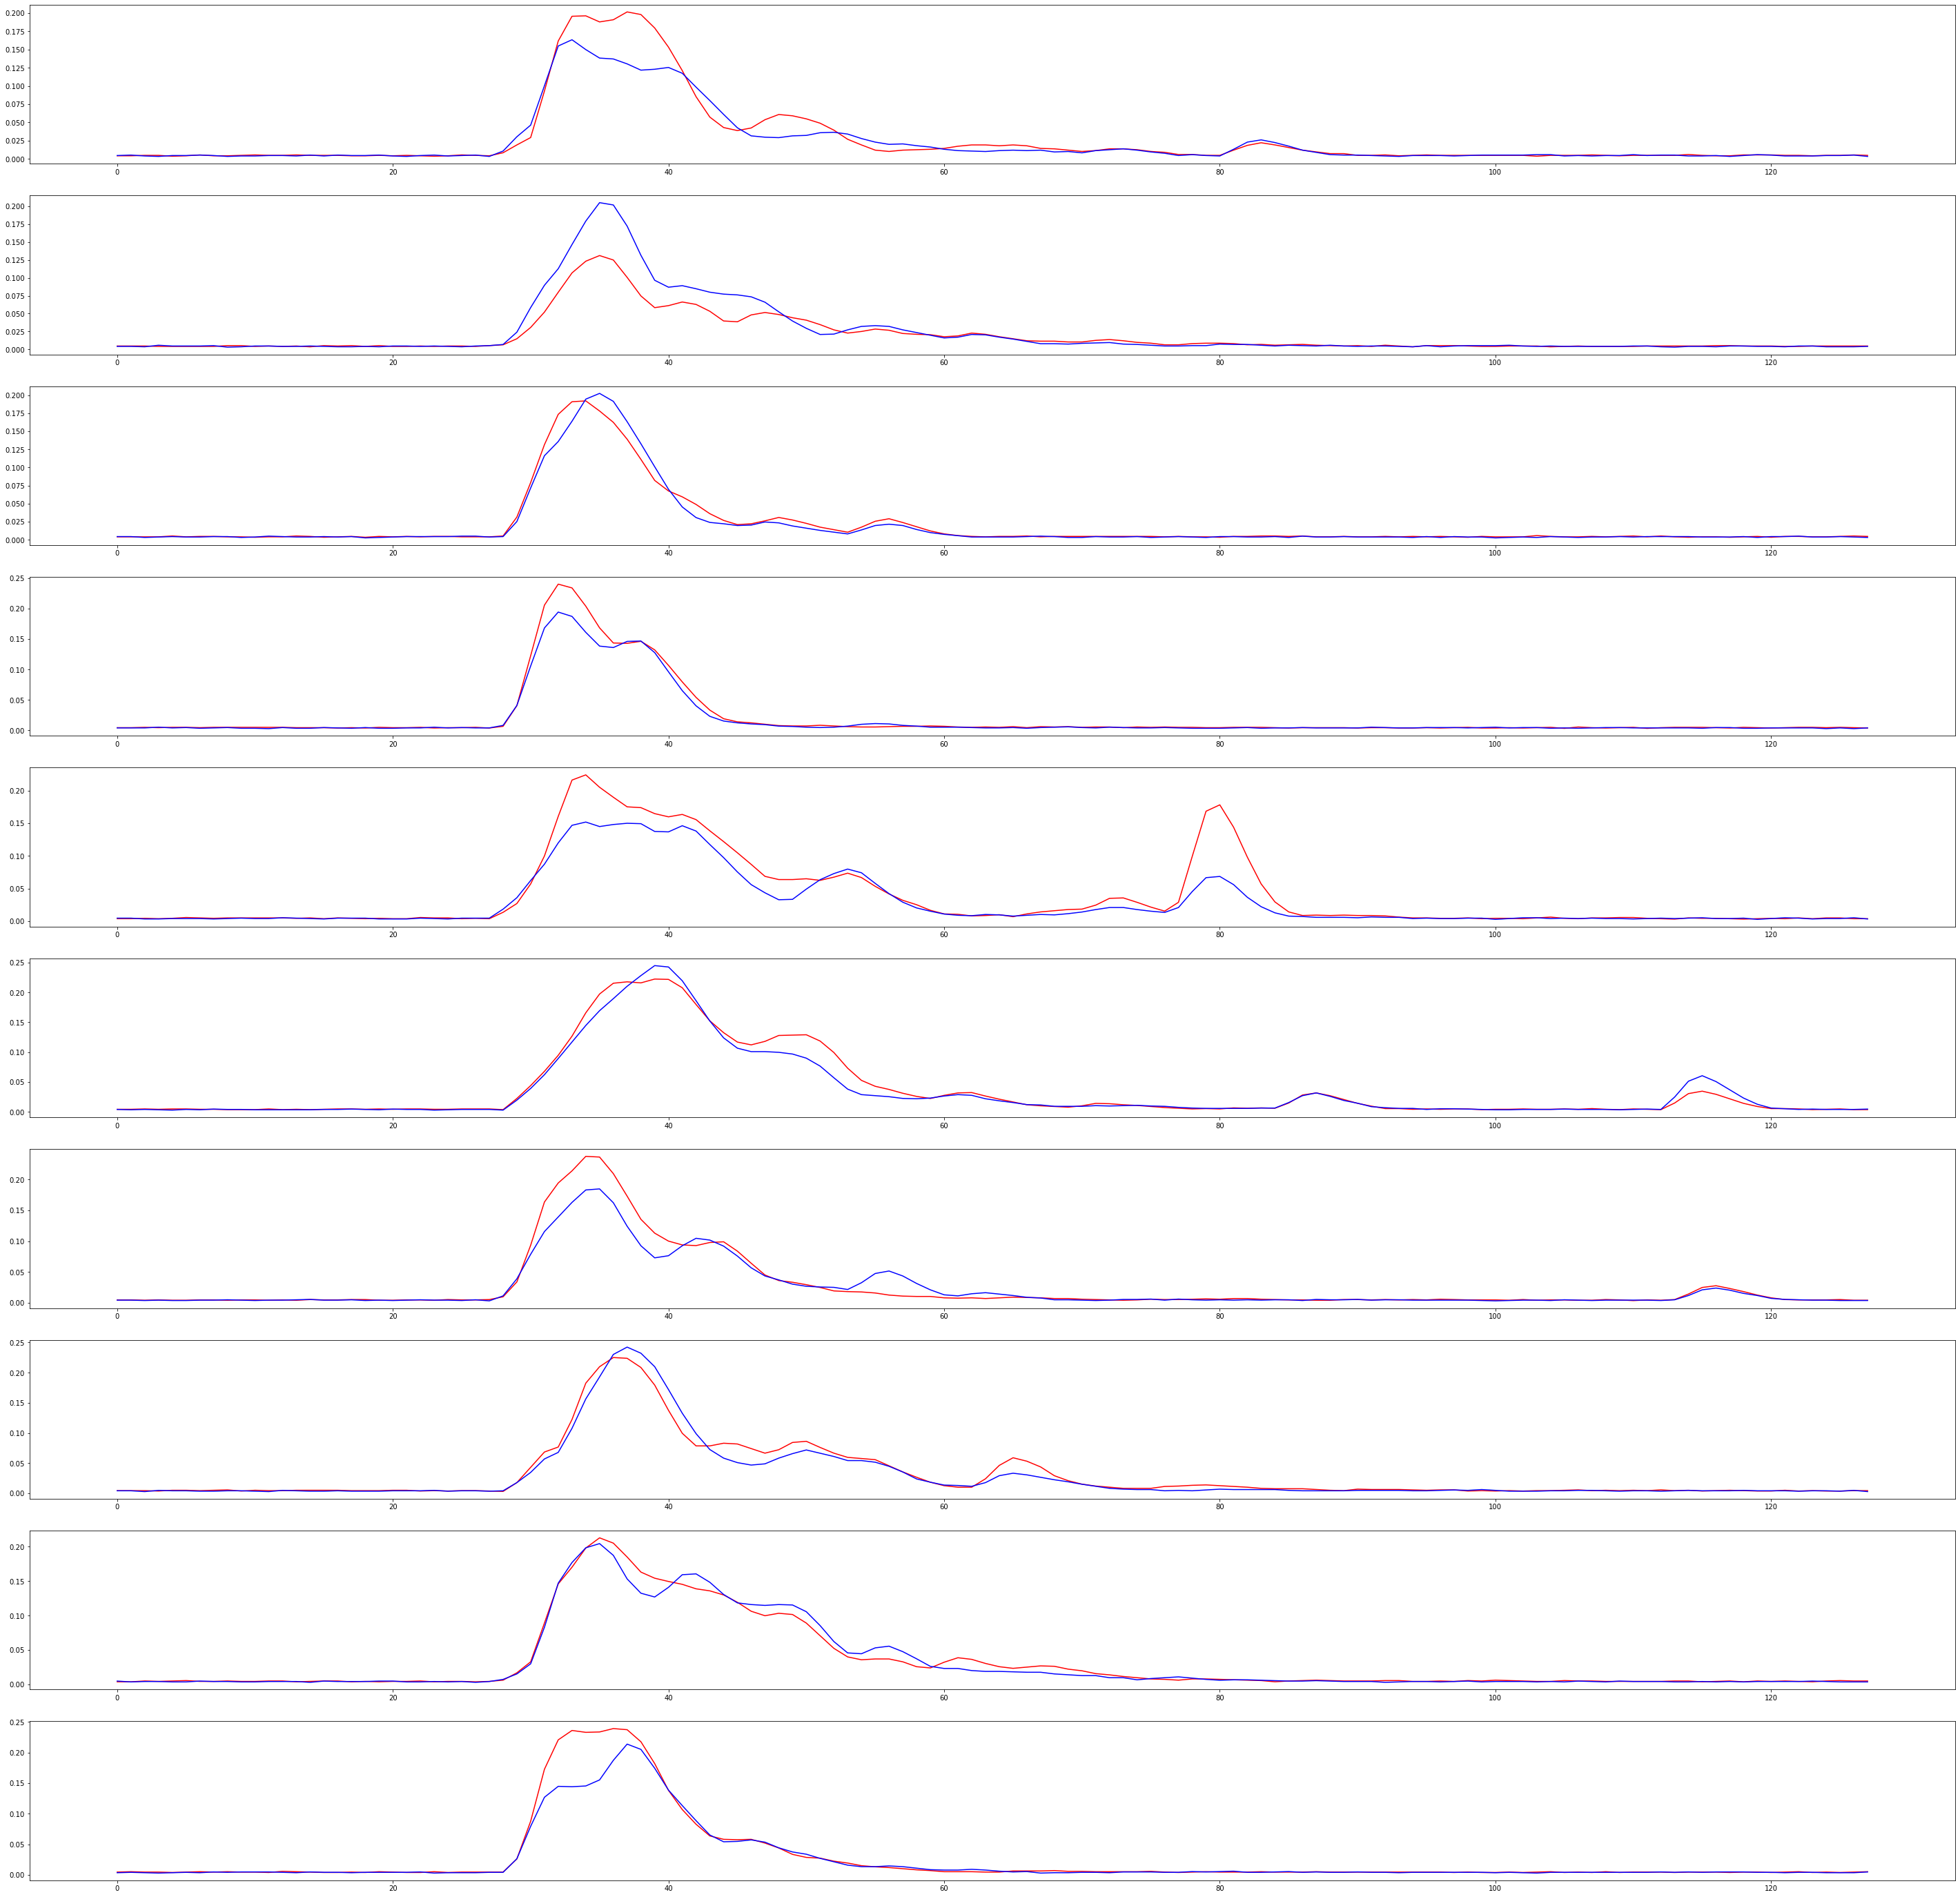

In [5]:
k=0
fig, axes =plt.subplots(10,1,figsize=(50,50))
for i in train[1000:]:
    if ((tf.reduce_max(i)<0.25) and (tf.reduce_max(i)>0.2)):
        axes[k].plot(i[:,1],'r')
        axes[k].plot(i[:,0],'b')
        k+=1
        if k==10:
            break
    

In [ ]:
generator=tf.keras.models.load_model('NOT_WGAN_2/save_model/generator/ep'+str(ep))
discriminator=tf.keras.models.load_model('NOT_WGAN_2/save_model/discriminator/ep'+str(ep))
noise_dim=200
noise = tf.random.normal(shape=(2000,noise_dim))
data=generator(noise)
max_el=np.zeros(len(data))
for i in range(len(data)):
    max_el[i]=tf.math.reduce_max(data[i])
    
# print(len(max_el))    
plt.hist(max_el,20,(0,1))
plt.xlabel('max MIP')
plt.ylabel('Num')
# plt.savefig('fake_hist.png')
noise_dim=200
noise = tf.random.normal(shape=(2000,noise_dim))
data=generator(noise)
max_el=np.zeros(len(data))
for i in range(len(data)):
    max_el[i]=tf.math.reduce_max(data[i])
    
# print(len(max_el))    
plt.hist(max_el,20,(0,1))
plt.xlabel('max MIP')
plt.ylabel('Num')
# plt.savefig('fake_hist.png')

In [38]:
generator.summary()

Model: "Generator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 200)]             0         
_________________________________________________________________
dense_42 (Dense)             (None, 200)               40000     
_________________________________________________________________
batch_normalization_81 (Batc (None, 200)               800       
_________________________________________________________________
leaky_re_lu_91 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 198)               39600     
_________________________________________________________________
dropout_98 (Dropout)         (None, 198)               0         
_________________________________________________________________
batch_normalization_82 (Batc (None, 198)           

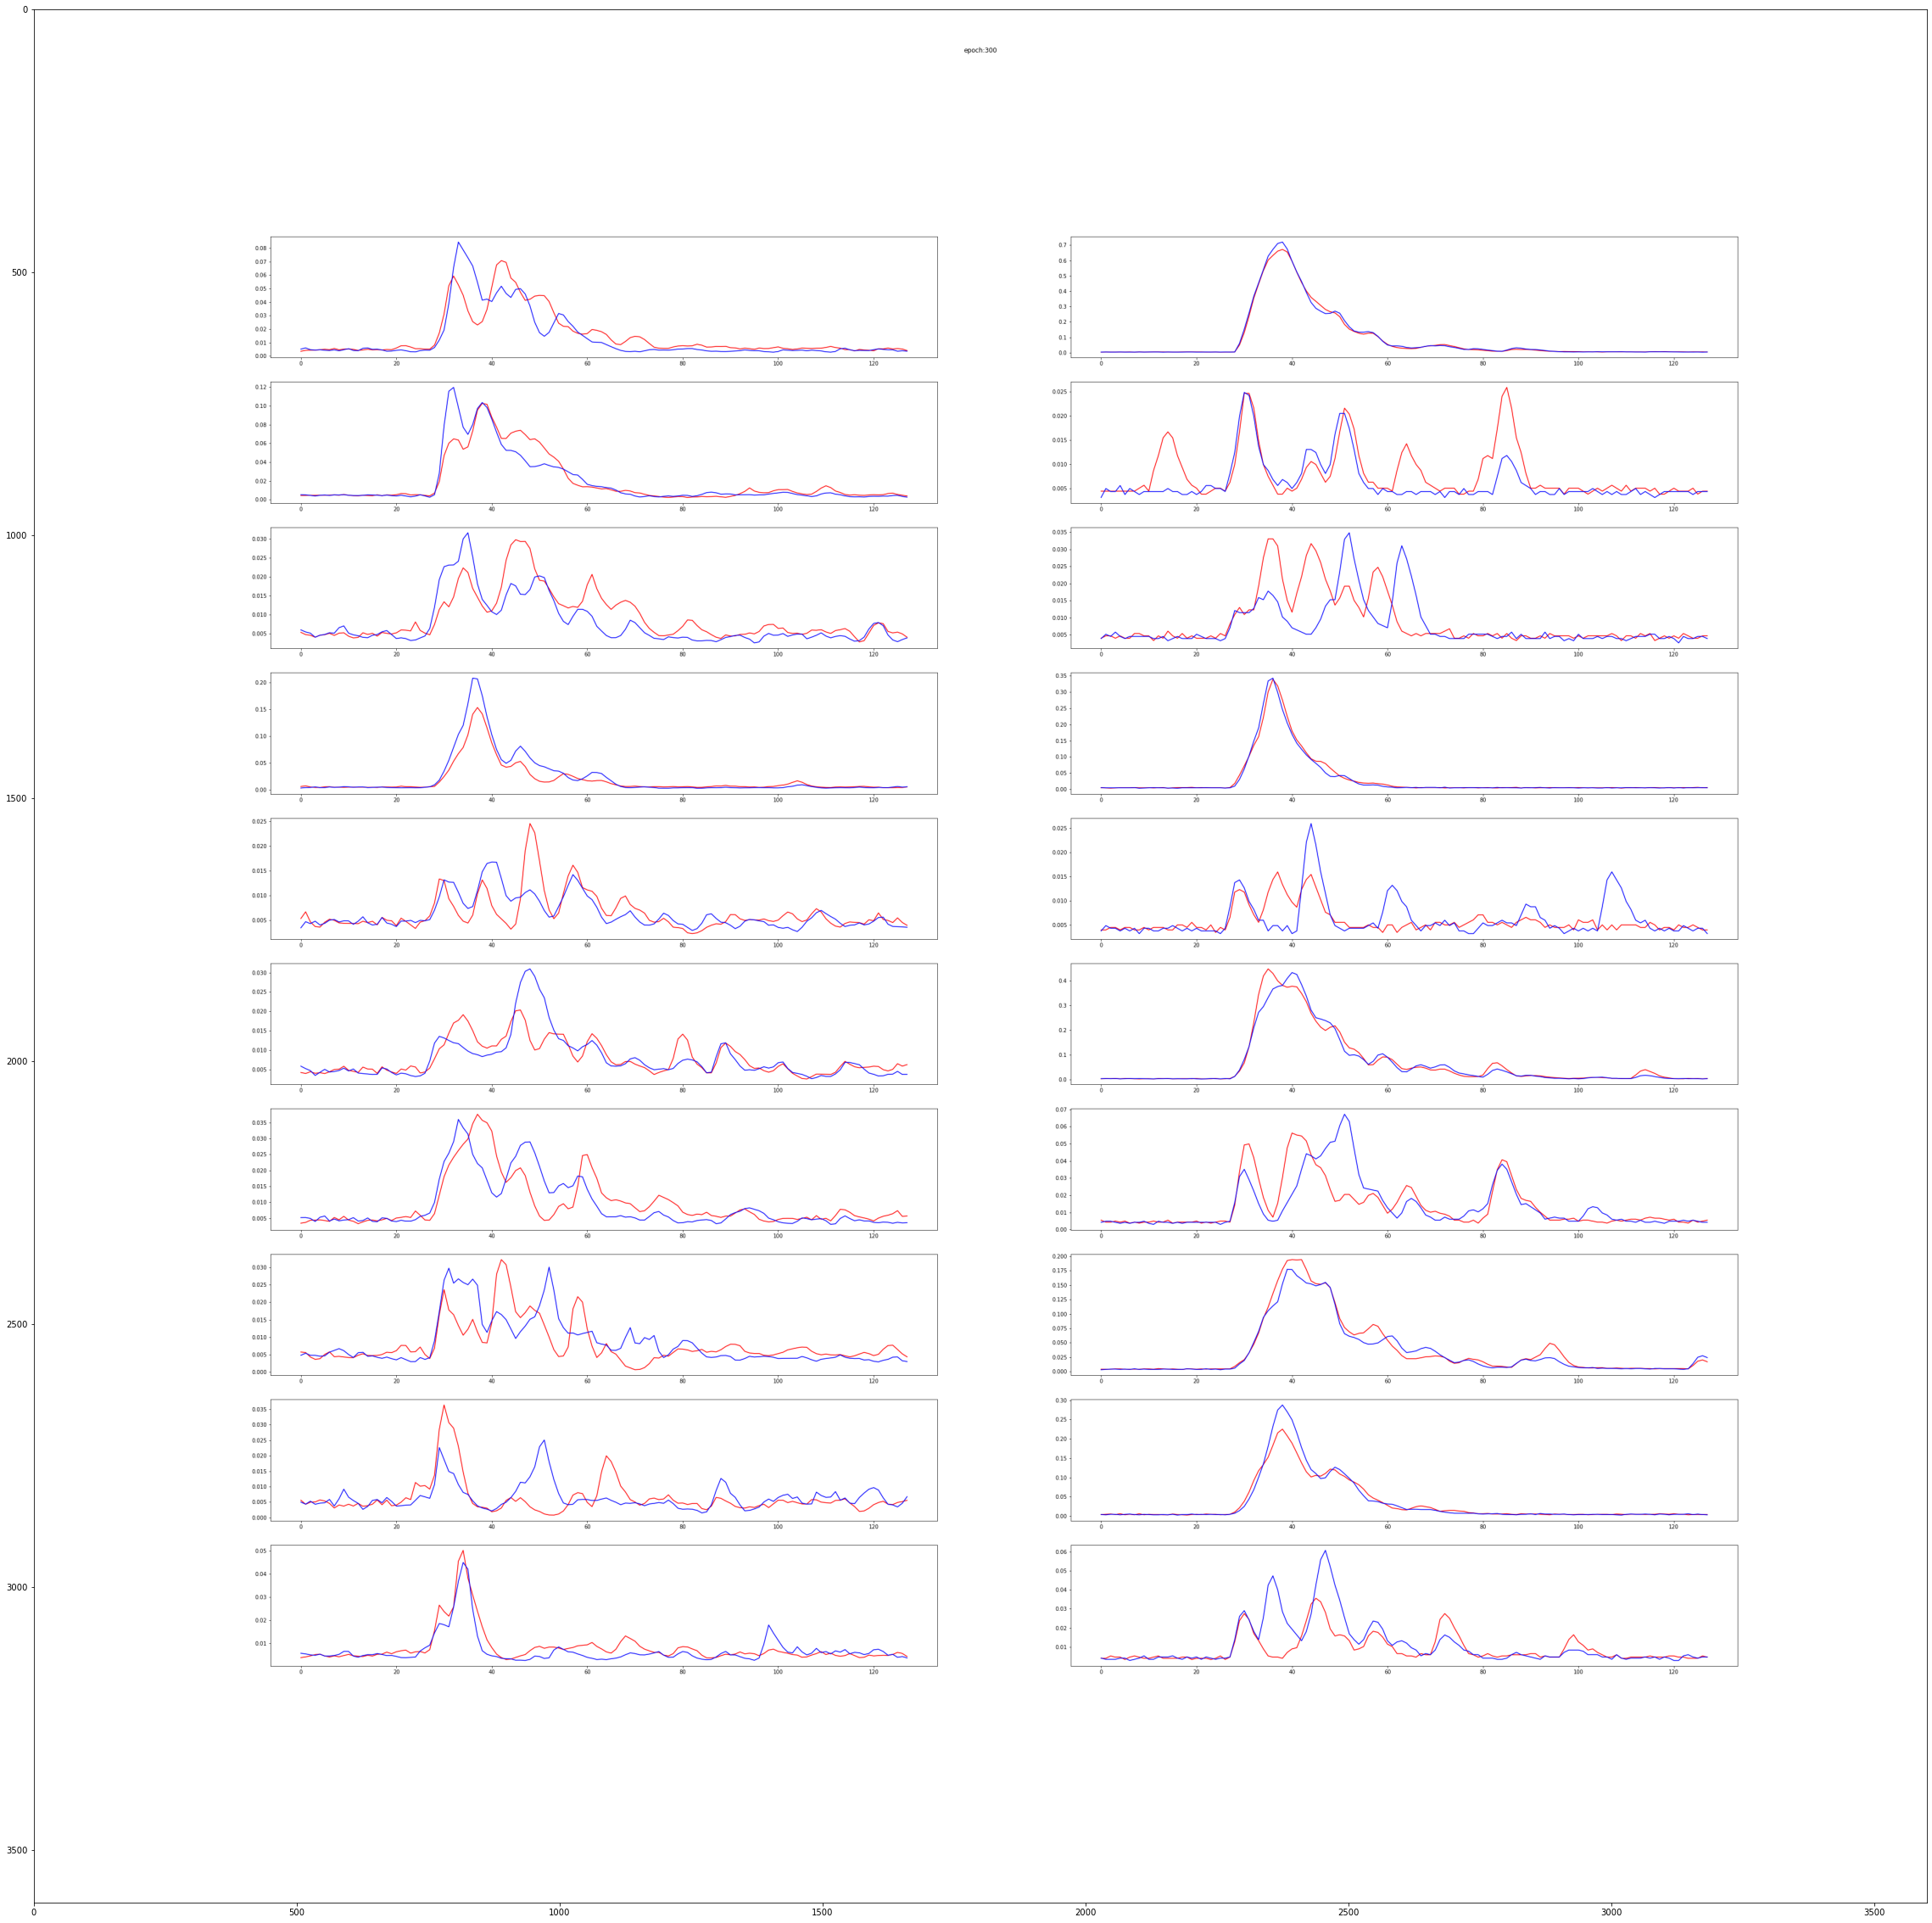

In [18]:
fig, ax = plt.subplots(figsize=(40, 60))
im=plt.imread('NOT_WGAN_2/save_images/epoch{}.png'.format(ep))
ax.imshow(im)

Text(0, 0.5, 'Num')

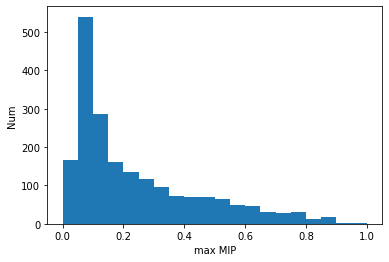

In [48]:
ep=490
generator=tf.keras.models.load_model('NOT_WGAN/save_model/generator/ep'+str(ep))
noise_dim=200
noise = tf.random.normal(shape=(2000,noise_dim))
data=generator(noise)
max_el=np.zeros(len(data))
for i in range(len(data)):
    max_el[i]=tf.math.reduce_max(data[i])
    
# print(len(max_el))    
plt.hist(max_el,20,(0,1))
plt.xlabel('max MIP')
plt.ylabel('Num')

In [40]:
generator.summary()

Model: "Generator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20000     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 66)                6600      
_________________________________________________________________
dropout_16 (Dropout)         (None, 66)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 66)            

Model: "Discriminator_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 128, 2)]     0                                            
__________________________________________________________________________________________________
zero_padding1d (ZeroPadding1D)  (None, 148, 2)       0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 74, 64)       1344        zero_padding1d[0][0]             
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 37, 64)       0           conv1d_5[0][0]                   
________________________________________________________________________________

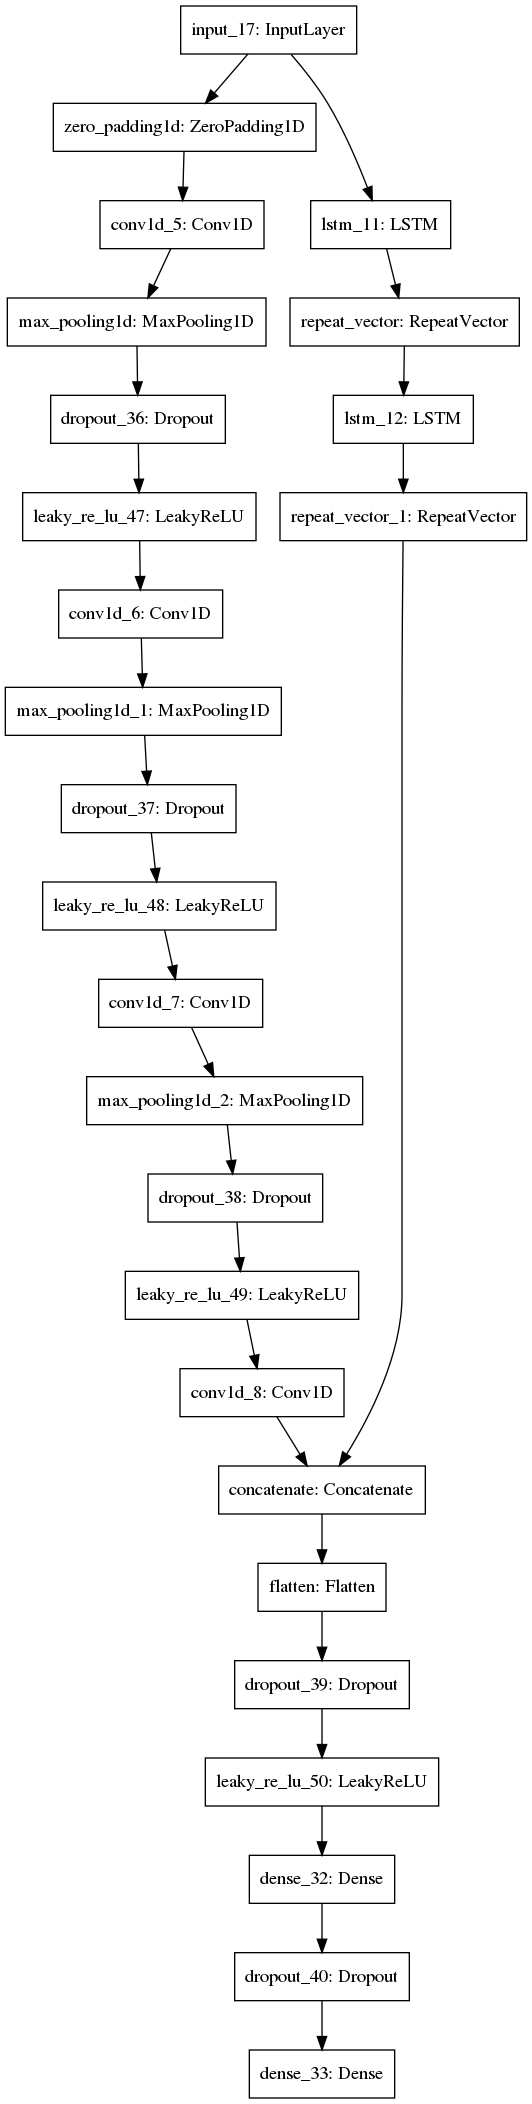

In [25]:
discriminator=tf.keras.models.load_model('GAN_LSTM/save_model/discriminator/ep'+str(0))
discriminator.summary()
tf.keras.utils.plot_model(discriminator)

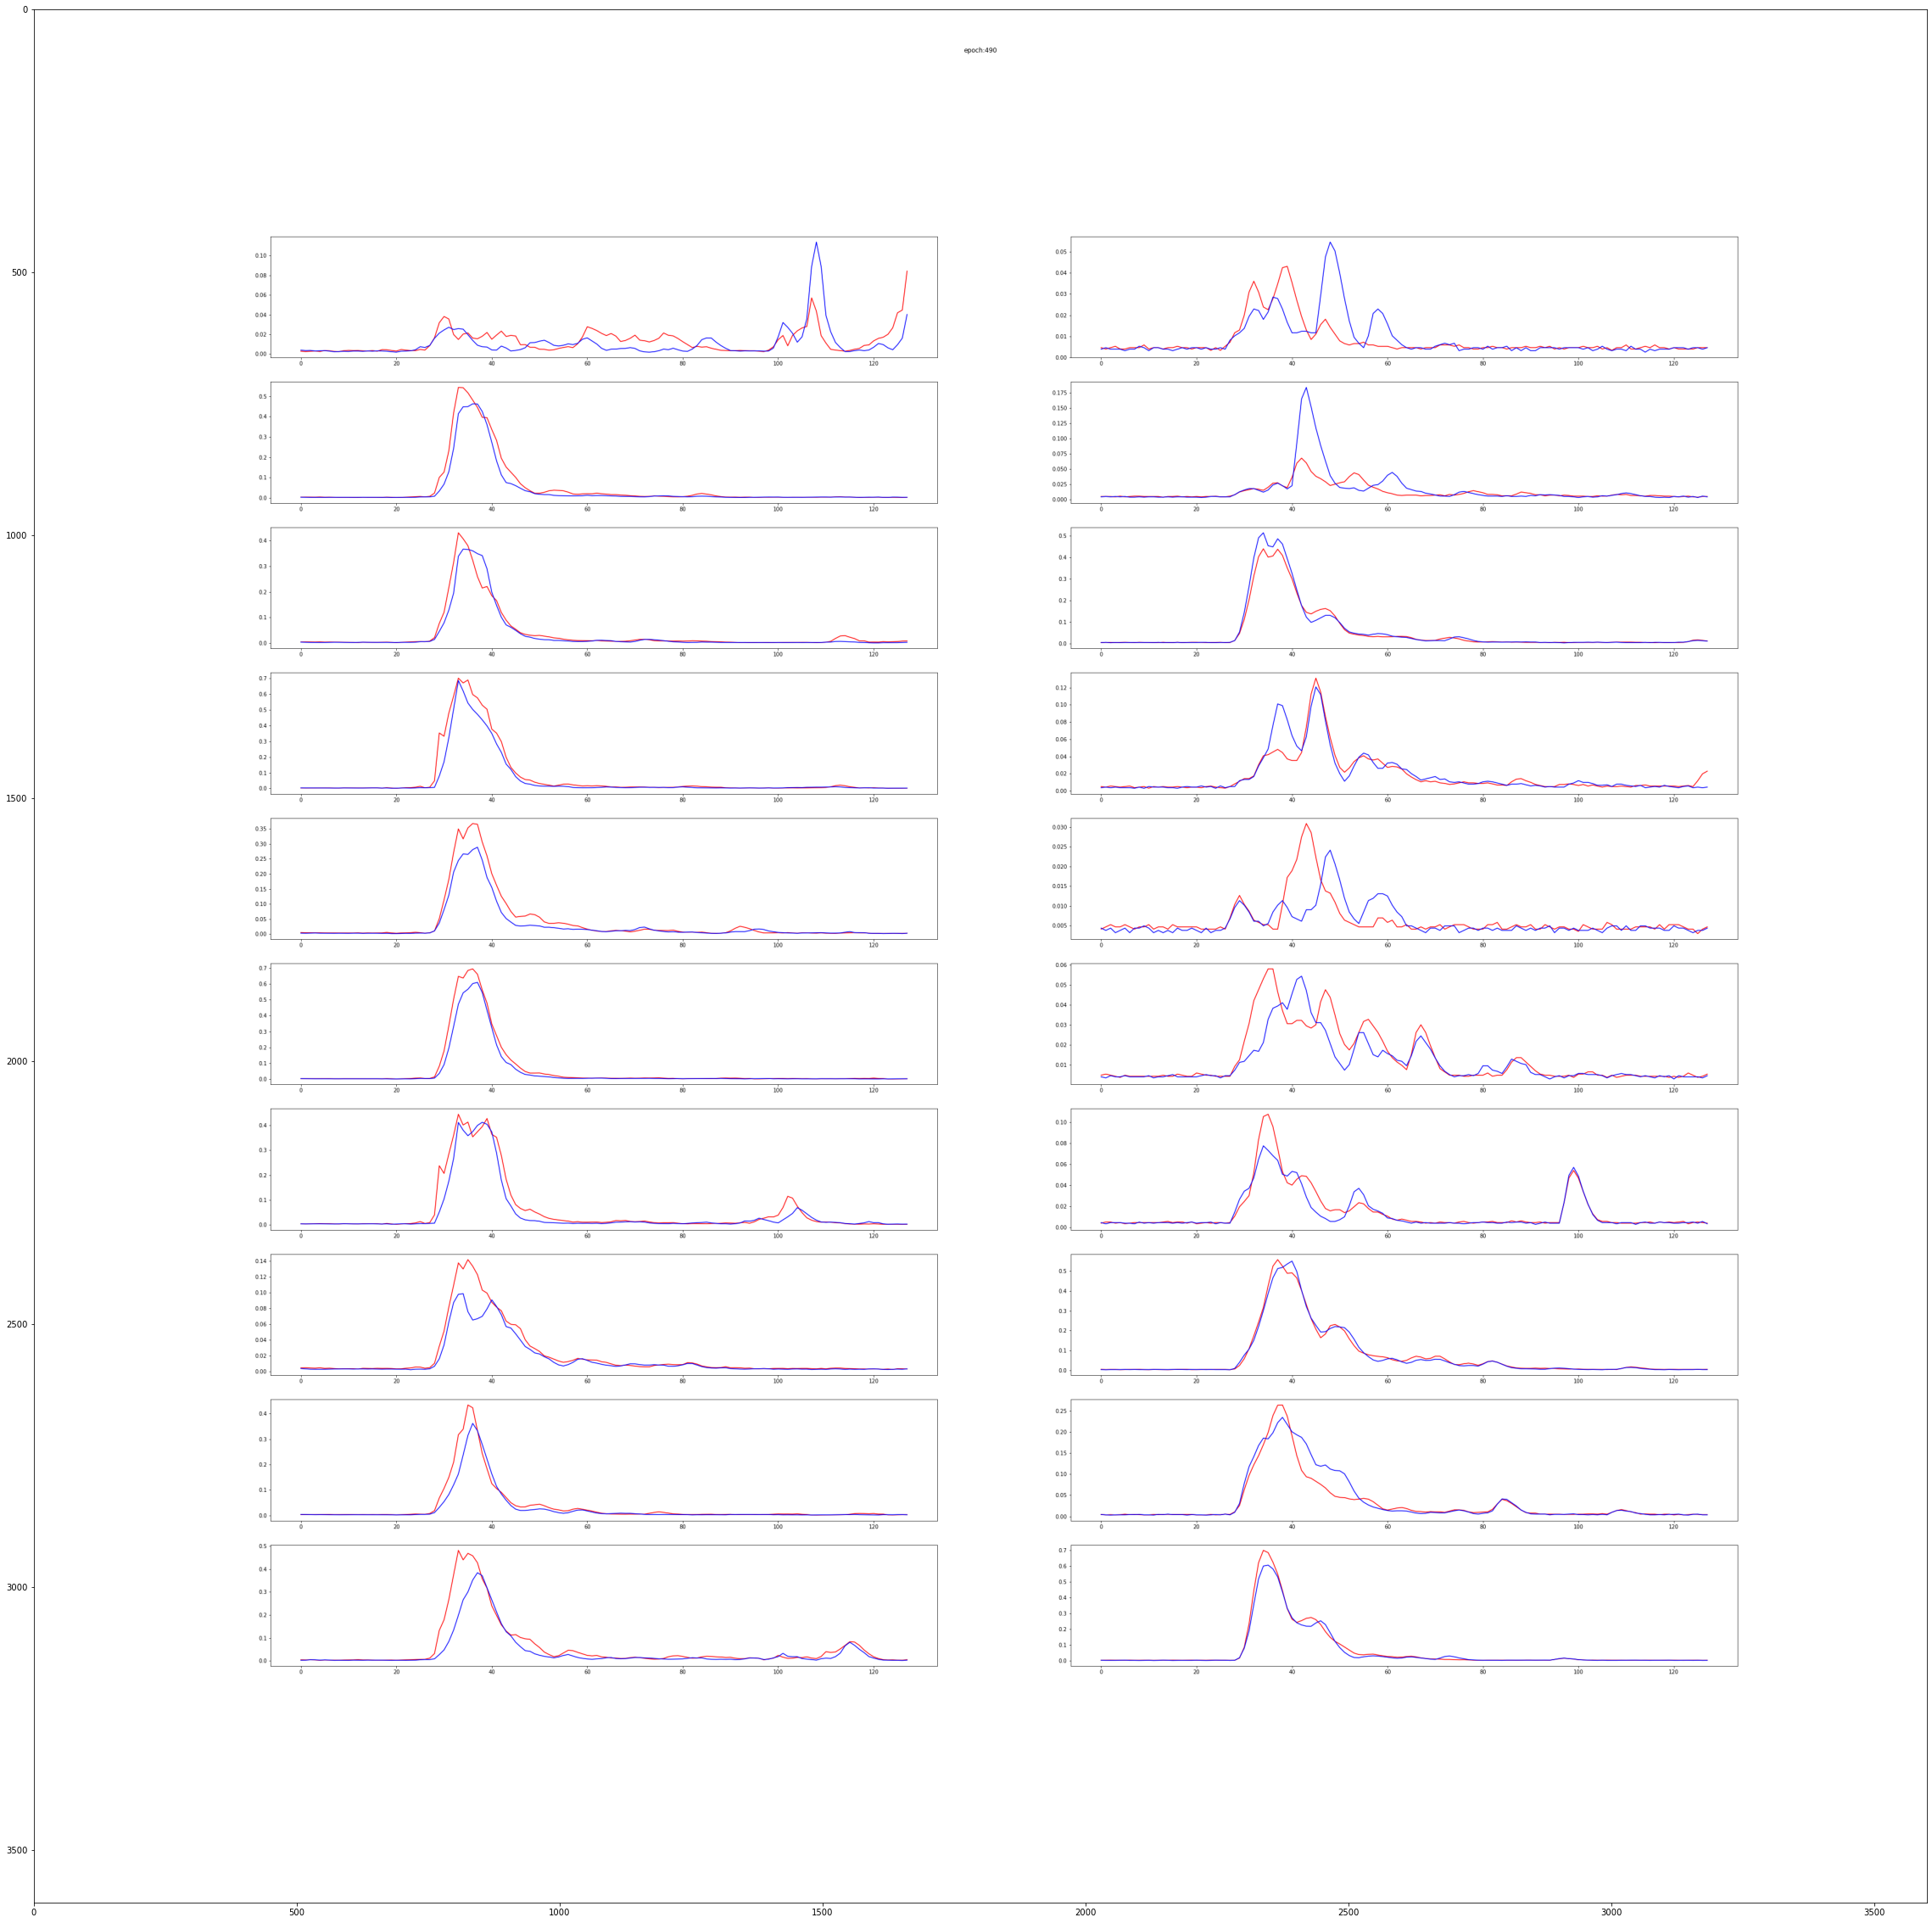

In [41]:
fig, ax = plt.subplots(figsize=(40, 60))
im=plt.imread('NOT_WGAN/save_images/epoch{}.png'.format(ep))
ax.imshow(im)

Text(0, 0.5, 'Num')

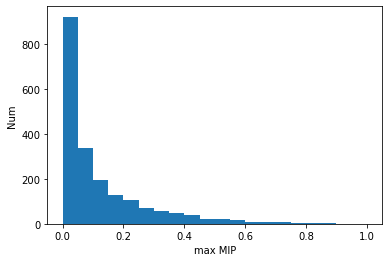

In [56]:
ep=250
generator=tf.keras.models.load_model('WGAN_REAL2/save_model/generator/ep'+str(ep))
noise_dim=200
noise = tf.random.normal(shape=(2000,noise_dim))
data=generator(noise)
max_el=np.zeros(len(data))
for i in range(len(data)):
    max_el[i]=tf.math.reduce_max(data[i])
    
# print(len(max_el))    
plt.hist(max_el,20,(0,1))
plt.xlabel('max MIP')
plt.ylabel('Num')

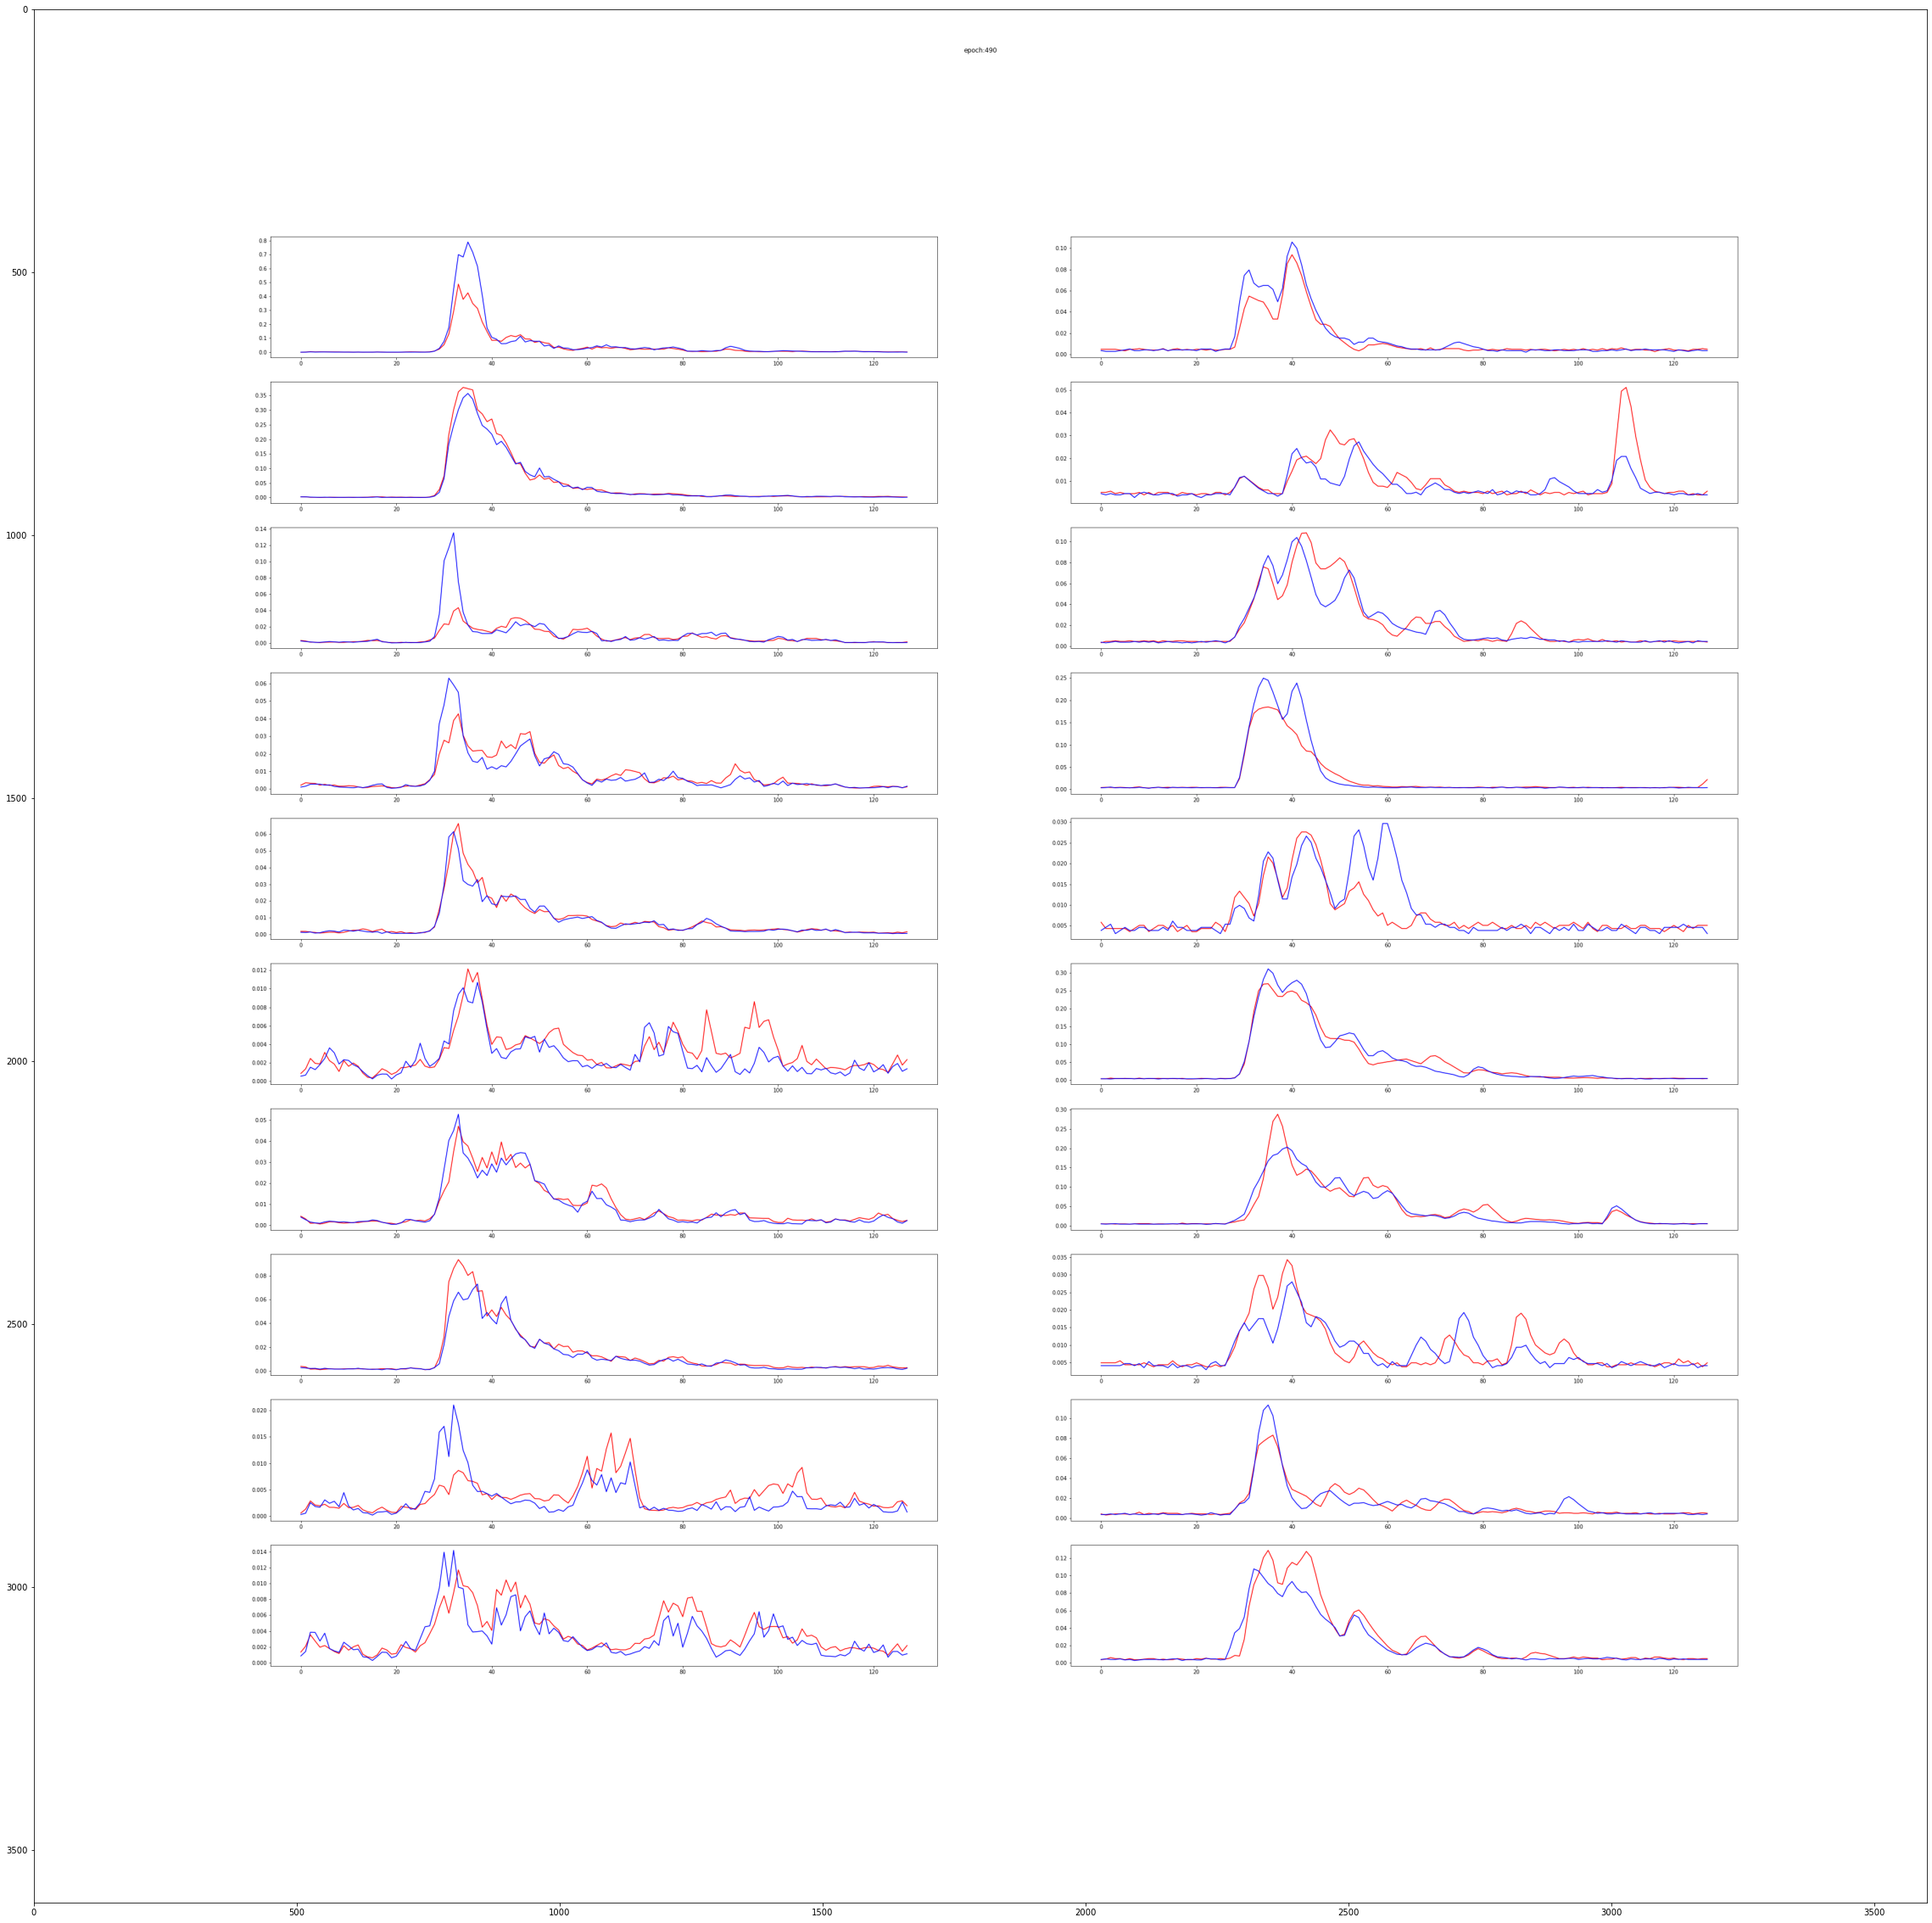

In [27]:
fig, ax = plt.subplots(figsize=(40, 60))
im=plt.imread('WGAN_REAL2/save_images/epoch{}.png'.format(ep))
ax.imshow(im)

In [44]:
generator.summary()

Model: "Generator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 200)]             0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20000     
_________________________________________________________________
batch_normalization_25 (Batc (None, 100)               400       
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 66)                6600      
_________________________________________________________________
dropout_36 (Dropout)         (None, 66)                0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 66)            

In [11]:
discriminator=tf.keras.models.load_model('WGAN_REAL2/save_model/discriminator/ep'+str(ep))
discriminator.summary()

Model: "Discriminator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 128, 2)]          0         
_________________________________________________________________
zero_padding1d_4 (ZeroPaddin (None, 148, 2)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 37, 64)            1344      
_________________________________________________________________
dropout_40 (Dropout)         (None, 37, 64)            0         
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 37, 64)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 19, 128)           82048     
_________________________________________________________________
dropout_41 (Dropout)         (None, 19, 128)   

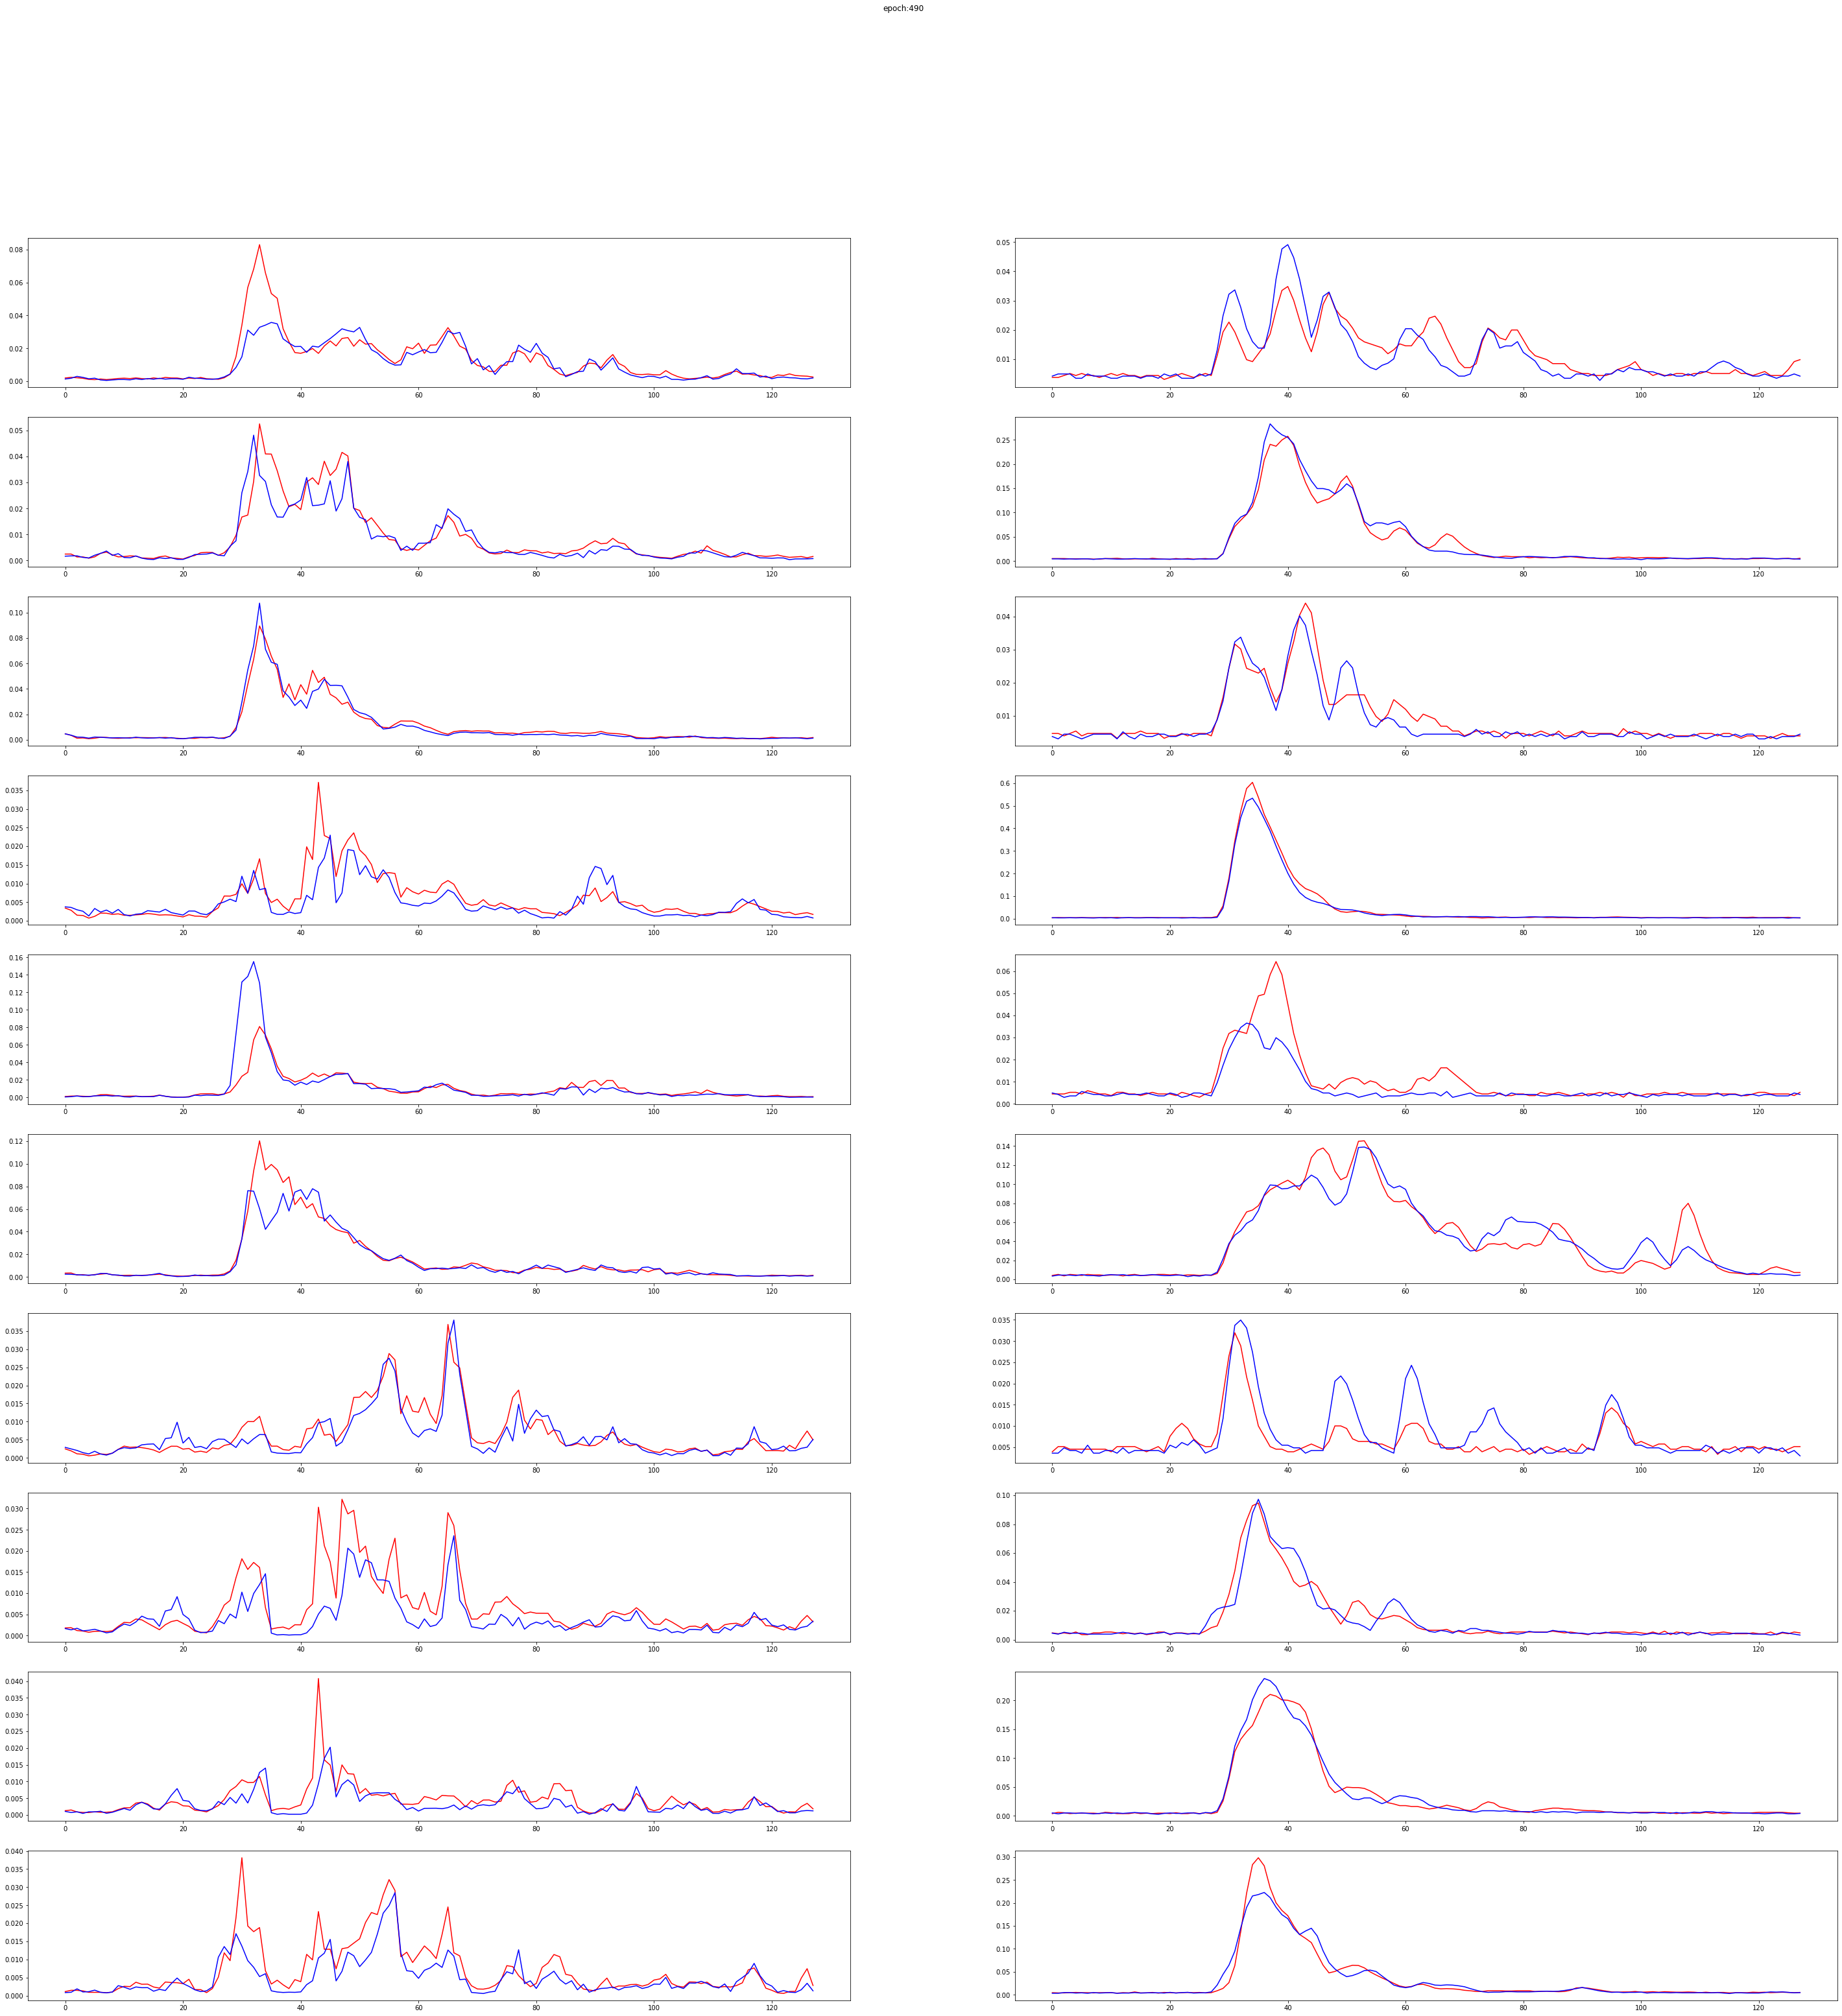

In [39]:
image(490)

In [44]:
generator=tf.keras.models.load_model('BA/WGAN_not_agr/save_model/discriminator/ep'+str(i))
generator.summary()

Model: "Discriminator_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 2)]          0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 148, 2)            0         
_________________________________________________________________
first (Conv1D)               (None, 148, 64)           1344      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 74, 64)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 74, 64)            0         
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 74, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 74, 64)    

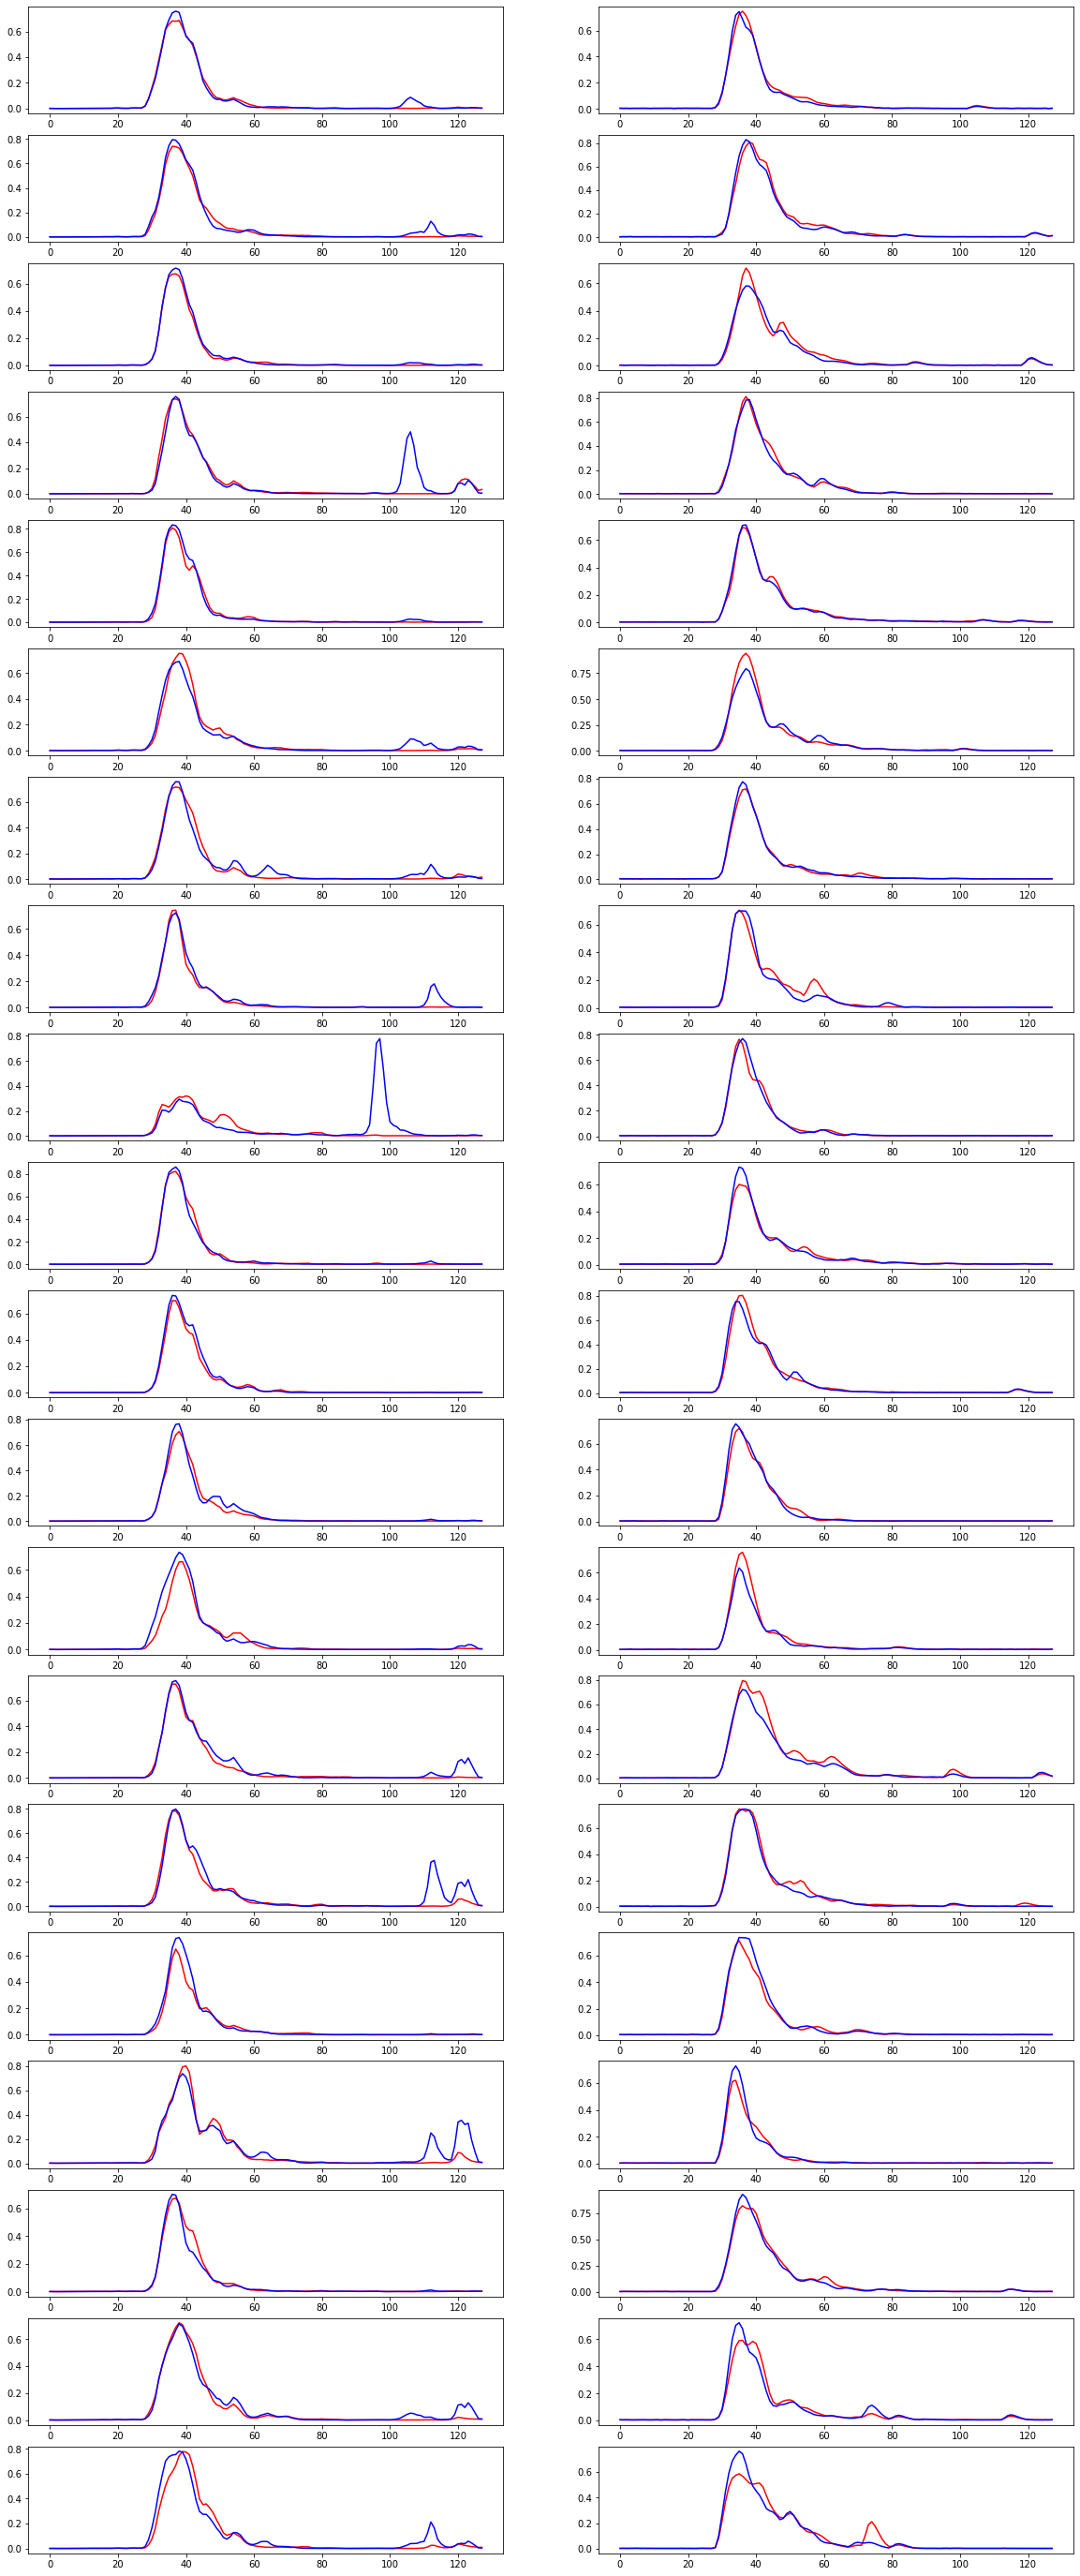

In [7]:
i=20
generator=tf.keras.models.load_model('BA/WGAN_not_agr_mean3/save_model/generator/ep'+str(i))
noise_dim=200
noise = tf.random.normal(shape=(2000,noise_dim))
data=generator(noise)

def big_ampl(por:set,z:int):
    fig, axes =plt.subplots(z,2,figsize=(20,50))
    j=0
    por_min, por_max=por 
    for i in range(len(data)):
        if (tf.math.reduce_max(data[i])>por_min and tf.math.reduce_max(data[i])<por_max) :
            axes[j,0].plot(data[i][:,1],'r')#change
            axes[j,0].plot(data[i][:,0],'b')
            j+=1
            if j>z-1:
                break
    j=0
    
    q=random.randint(0,len(train)//2)
    for i in range(q,len(train)):
        if (tf.math.reduce_max(train[i])>por_min and tf.math.reduce_max(train[i])<por_max):
            axes[j,1].plot(train[i][:,1],'r')#change
            axes[j,1].plot(train[i][:,0],'b')
            j+=1
            if j>z-1:
                break
big_ampl((0.7,1),20) 

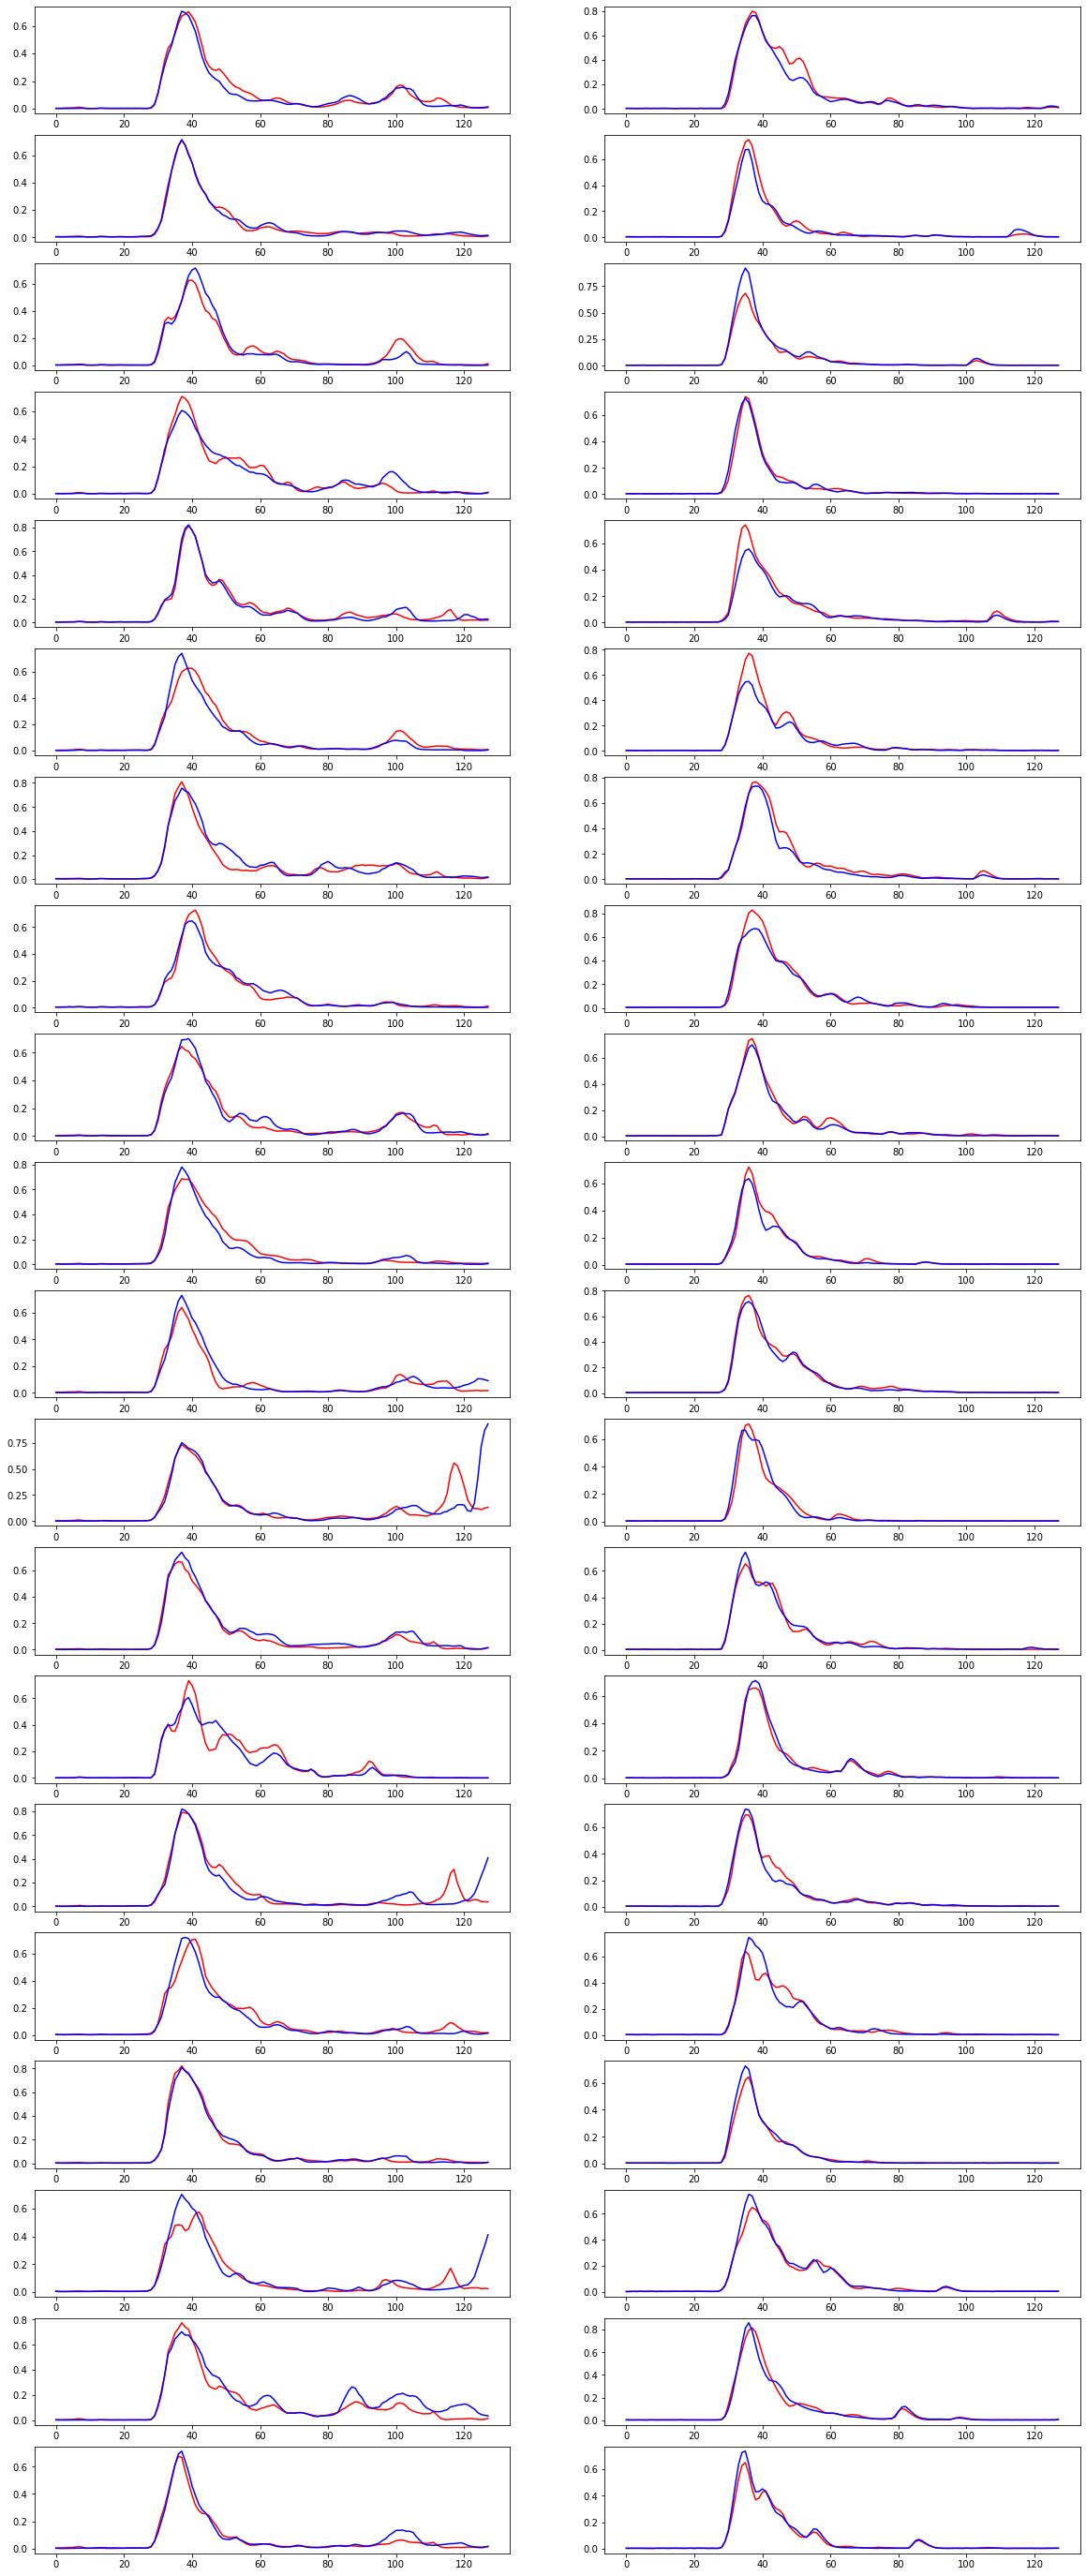

In [29]:
i=25
generator=tf.keras.models.load_model('BA/WGAN_agr_mean(all_51)/save_model/generator/ep'+str(i))
noise_dim=200
noise = tf.random.normal(shape=(2000,noise_dim))
data=generator(noise)
big_ampl((0.7,1),20) 

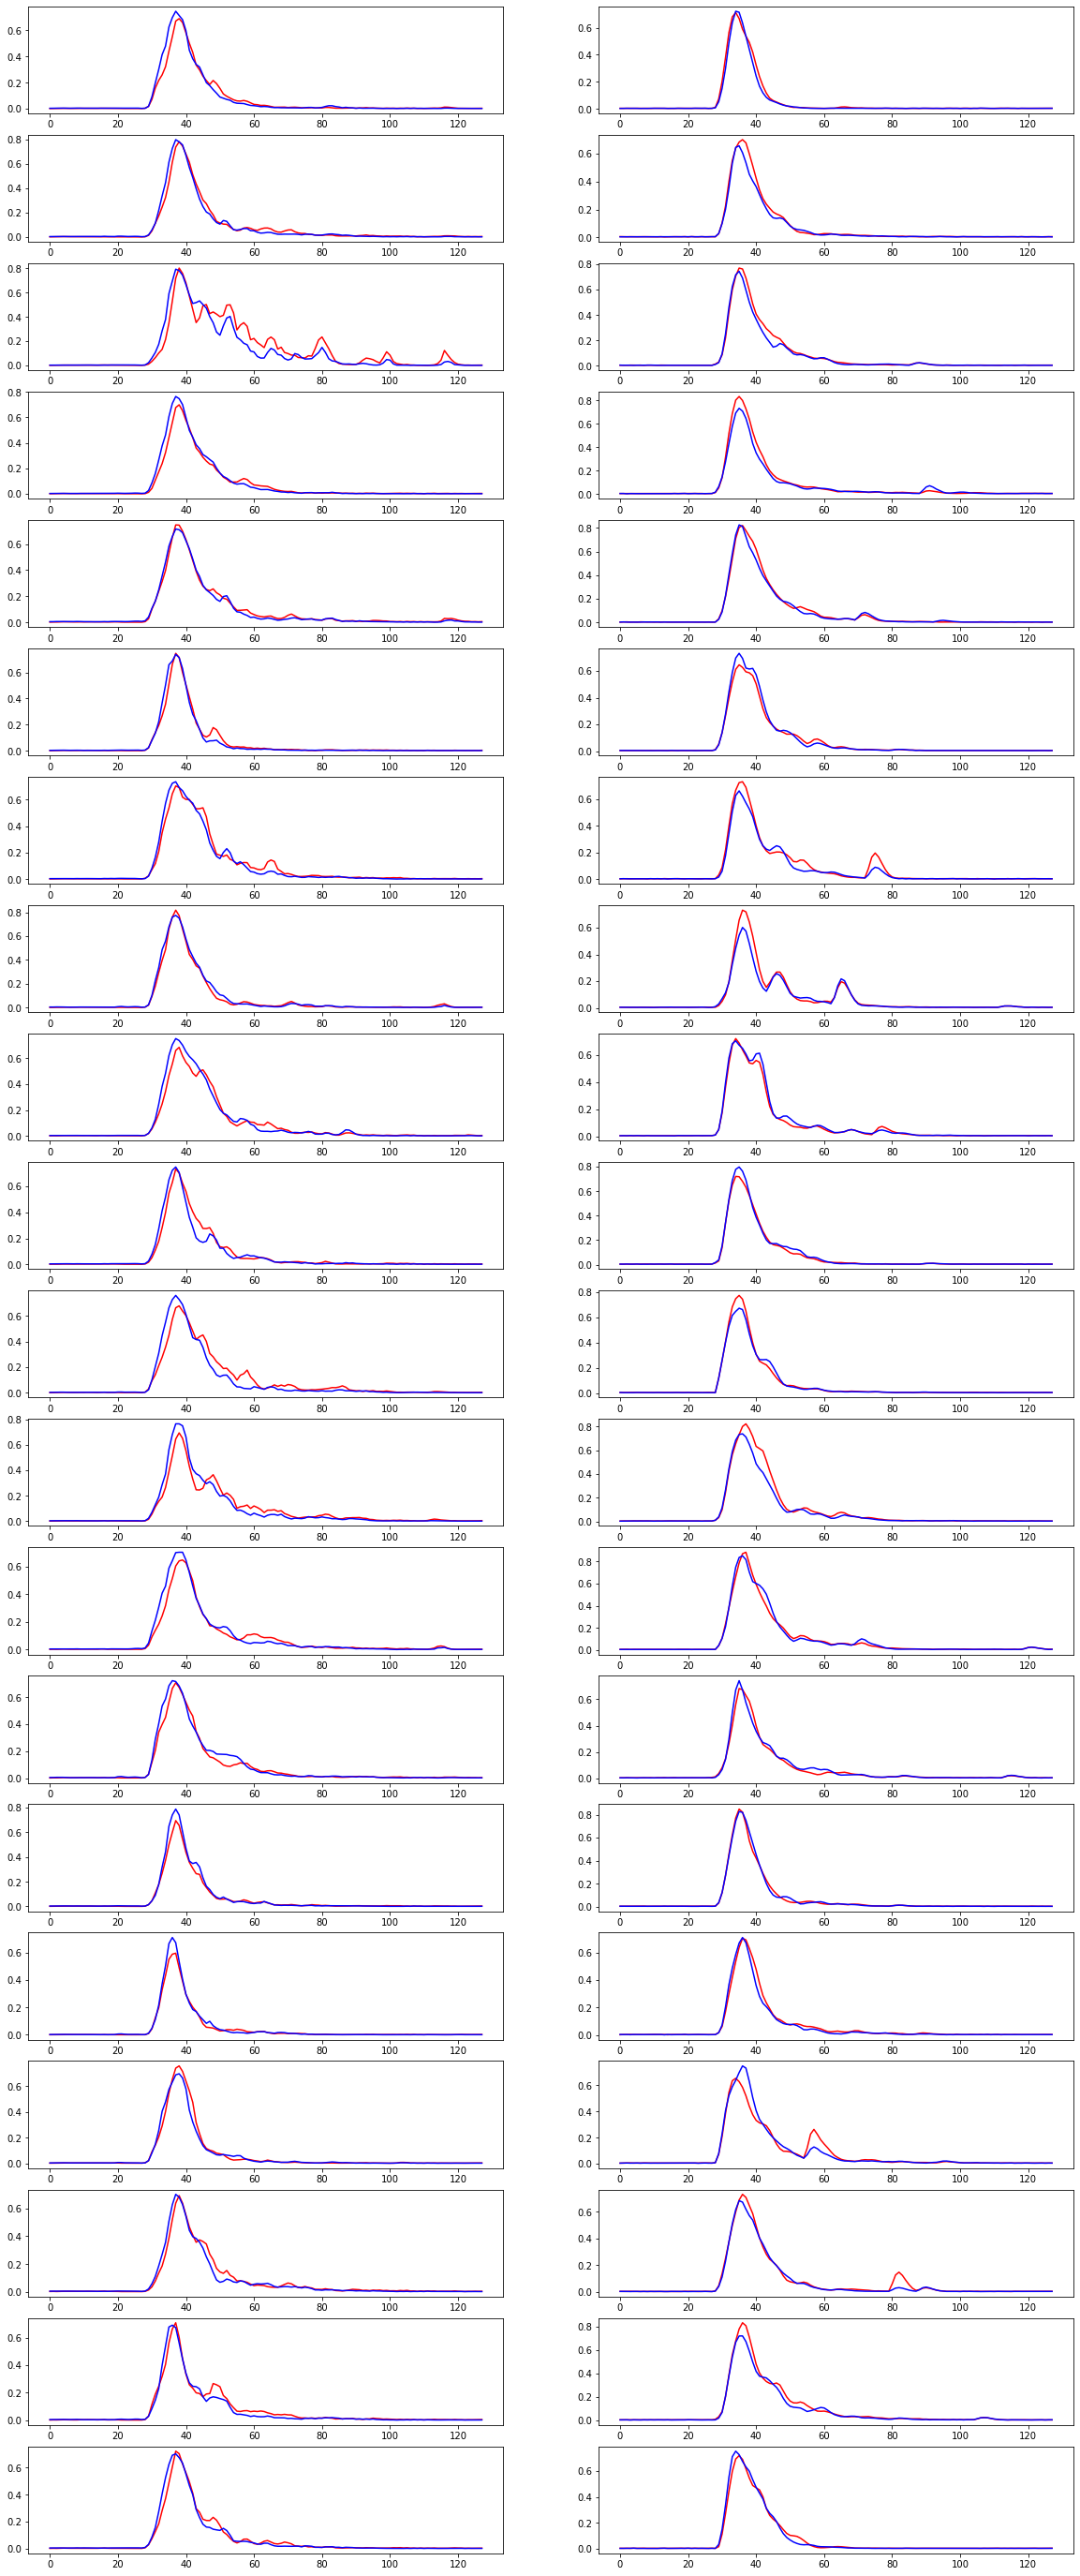

In [25]:
i=20
generator=tf.keras.models.load_model('BA/WGAN_not_agr_mean_kern2/save_model/generator/ep'+str(i))
noise_dim=200
noise = tf.random.normal(shape=(2000,noise_dim))
data=generator(noise)
big_ampl((0.7,1),20) 

Text(0, 0.5, 'Num')

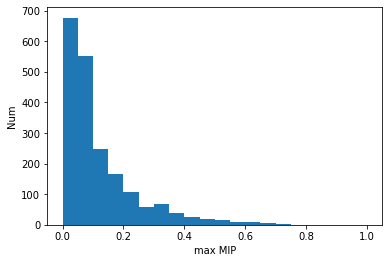

In [54]:
ep=250
generator=tf.keras.models.load_model('WGAN_3/save_model/generator/ep'+str(ep))
noise_dim=200
noise = tf.random.normal(shape=(2000,noise_dim))
data=generator(noise)
max_el=np.zeros(len(data))
for i in range(len(data)):
    max_el[i]=tf.math.reduce_max(data[i])
    
# print(len(max_el))    
plt.hist(max_el,20,(0,1))
plt.xlabel('max MIP')
plt.ylabel('Num')

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


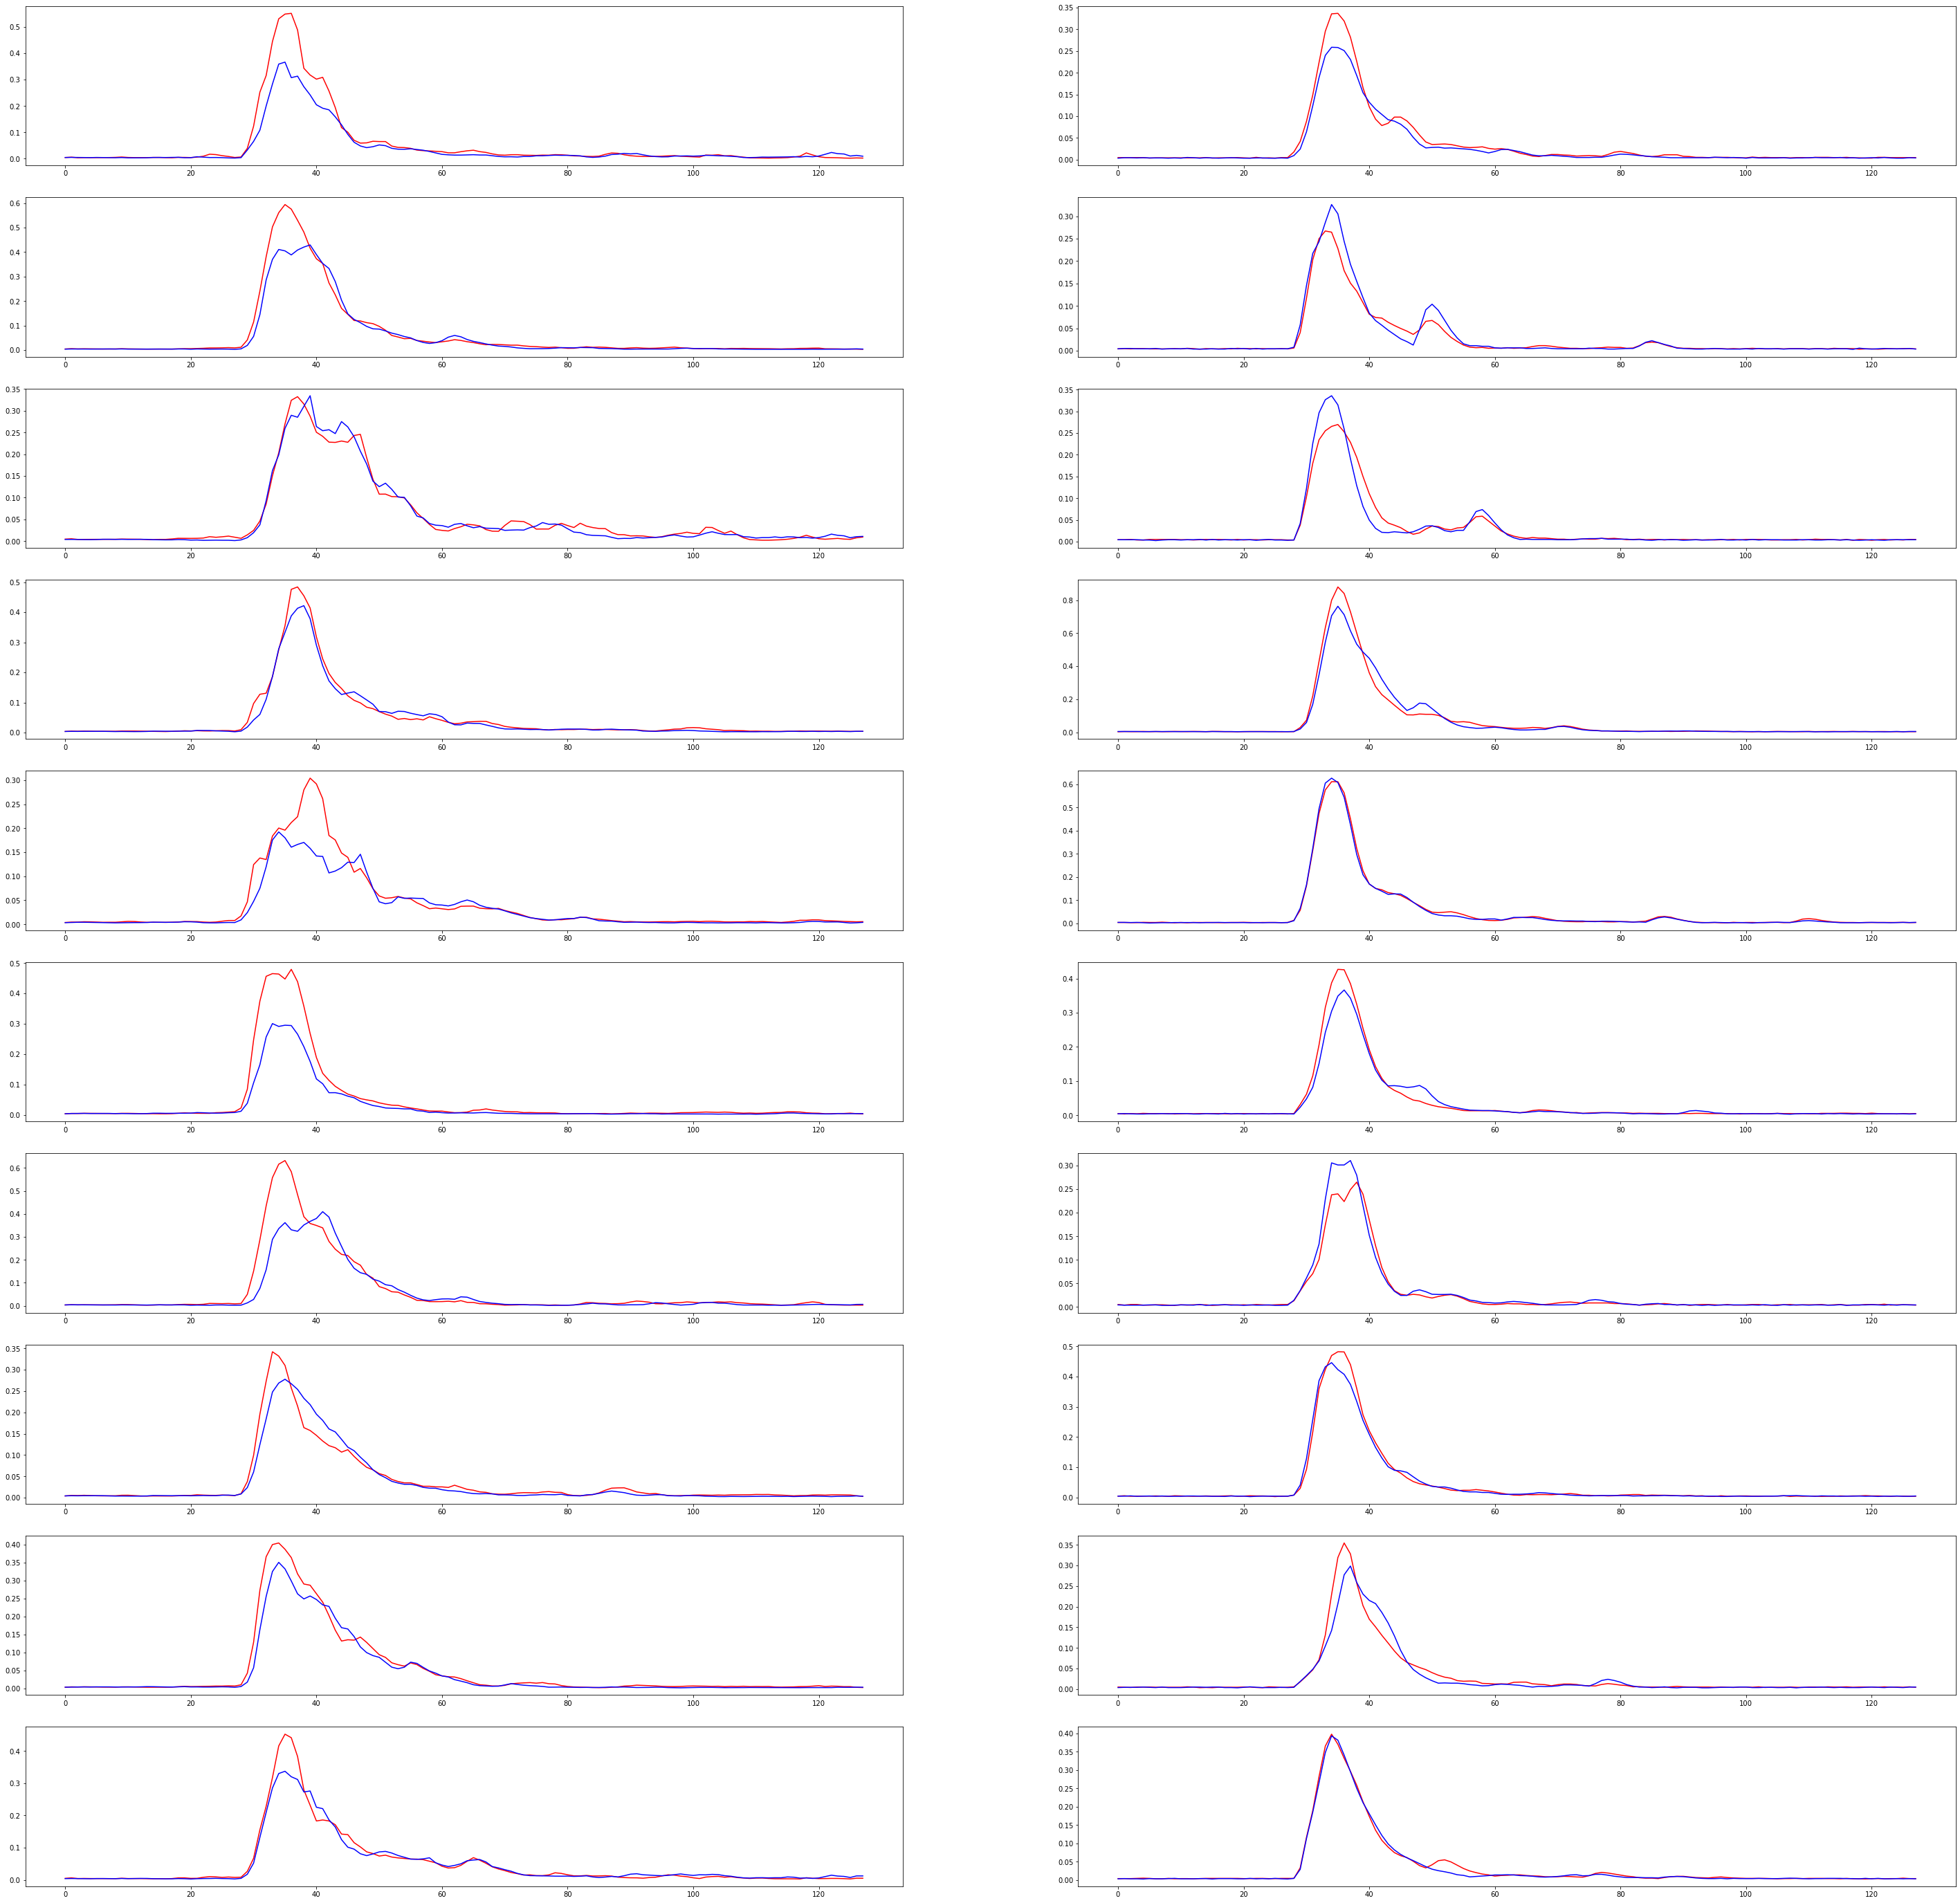

In [55]:
fig, axes =plt.subplots(10,2,figsize=(50,50))
j=0
for i in range(len(data)):
    if tf.math.reduce_max(data[i])>0.3:
        axes[j,0].plot(data[i][:,1],'r')#change
        axes[j,0].plot(data[i][:,0],'b')
        j+=1
        print(j)
        if j>9:
            break
j=0
for i in range(len(train)):
    if tf.math.reduce_max(train[i])>0.3:
        axes[j,1].plot(train[i][:,1],'r')#change
        axes[j,1].plot(train[i][:,0],'b')
        j+=1
        print(j)
        if j>9:
            break

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
import h5py
import tqdm
import zipfile
from tqdm.notebook import tqdm_notebook
from progress.bar import IncrementalBar
import random
import pandas as pd
import os
# tf.config.run_functions_eagerly(True)
%matplotlib inline
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['AUTOGRAPH_VERBOSITY'] = '0'

logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [3]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
with h5py.File("mc_wfmax_norm.h5",'r') as f:
    print(list(f.keys()))
    norm_param=f['norm_param'][:]
    test=f['test'][:]
    train=f['train'][:472320]
    print(f['train'].shape)
# mean=train.mean()
# train=train-mean
# train=train/(np.absolute(train)).max()
train=(train+1)/2
test=(test+1)/2
print(train.min(),train.max(),train.mean())
print(len(train))
print(norm_param)
train_huge=train[train.max(axis=1).max(axis=1)>0.2]
train.shape
train=train[:2425*64]

train_small=train[train.max(axis=1).max(axis=1)<0.2][:(25000//64)*64+2]
train=np.append(train_small,train_huge,axis=0)
np.random.shuffle(train)
train.shape

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
['norm_param', 'test', 'train']
(472351, 128, 2)
0.0 1.0 0.025971571
472320
[[ 0.04490717  0.04396976]
 [-0.99174523 -0.9909725 ]]


(180224, 128, 2)

In [ ]:
seccessful_models=['BA/WGAN_not_agr_mean_kern2']
noise_dict={'with_CONV2_real':200,'with_noise_198':398,'with_Conv2':233,'without_average':200,'BA/WGAN_not_agr_mean_kern2':200}
def Residual_loss(data_true, data_fake):
    return tf.reduce_mean( tf.math.abs(data_true - data_fake),axis=(1,2))
def Discriminator_loss(data_true, data_fake,discriminator):
    real_pred=discriminator(data_true)
    fake_pred=discriminator(data_fake)
    return tf.math.abs( real_pred - fake_pred)
def find_noise(generator,discriminator,image,noise_dim,alpha=1.2,k_rd=0.0001):
#         global loss_L
#     print(image.sha)
    loss_befor=1000000000
    k=0
    noise = tf.random.normal(shape=(image.shape[0],noise_dim))
    noise_befor=tf.identity(noise)
    for i in range(3000):
        with tf.GradientTape() as tape:
            tape.watch(noise)
            fake=generator(noise)
            loss=Residual_loss(image, fake)
            loss_disc=Discriminator_loss(image, fake,discriminator)*k_rd
            Loss=tf.reshape(loss,(-1,1))+loss_disc
#                 loss_L.append(Loss)
        g_grad=tape.gradient(Loss,noise)
        noise=noise-alpha*g_grad
        if tf.math.reduce_mean((loss_befor-Loss))<0.005*tf.math.reduce_mean(Loss):
            k+=1
            if k>7:
                break
        else:
            loss_befor=Loss
            k=0
            
    return (noise,noise_befor)
def func_chunks_generators(lst, n):
        '''передается масив и число.масив разбивается на масивы длиной не более n
        пример func_chunks_generators([1,2,3,4,5], 3) -> [[1,2,3],[4,5]]
        lst- масив
        n- число, пределяющее максимальную длину'''
        l=[]
        for i in range(0, len(lst), n):
             l.append(lst[i : i + n])
        return(l)
def metric(generator,discriminator,data,noise_dim,batch=64,k_rd=0.0001,name='???'):
    m=np.array([])
    data_list=func_chunks_generators(data,batch)
    for image in tqdm_notebook(data_list,name):
#         print(np.array(image).shape)
        image=np.reshape(np.array(image),(-1,128,2))
        image=np.array(image)
        noise_after,noise_befor=find_noise(generator,discriminator,image,noise_dim=noise_dim)
        fake=generator(noise_after)
        L_R=Residual_loss(image,fake)
        L_D=Discriminator_loss(image, fake,discriminator)*k_rd
        loss=L_R+L_D
        m=np.append(m,loss)
    return m.mean()

epochs=np.array([1,5,10,15,20,30],dtype=int)-1
df=pd.DataFrame(index=epochs,columns=seccessful_models)
for i in tqdm_notebook(range(len(seccessful_models)),'all'):
    noise_dim=noise_dict[seccessful_models[i]]
    for ep in tqdm_notebook(epochs,seccessful_models[i]):
        dir_name=os.path.join('seccessfuk_models',os.path.basename(seccessful_models[i]))
        gen_n=f'{dir_name}/save_model/generator/ep{ep}'
        generator=tf.keras.models.load_model(gen_n)
        disc_n=f'{dir_name}/save_model/discriminator/ep{ep}'
        discriminator=tf.keras.models.load_model(disc_n)
        met=metric(generator,discriminator,train[:5000],noise_dim,batch=64,k_rd=0.0001,name=os.path.basename(seccessful_models[i])+'   ' + str(ep))
        df[seccessful_models[i]][ep]=met
        print(met)
    
    
df.to_csv('seccessfuk_models/metrics_4.csv') 